In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Summerization and Preprocessing

In [2]:
# Reading data using pandas

data = pd.read_csv("/content/train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Understanding datatypes and null values count in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Understanding spread and central tendency of the data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Calculating Percentage of Missing values in each column
MpoF = {}
for i in data.columns:
  a = data[i].isna().value_counts()
  per = (data.shape[0]-a[False])/data.shape[0]*100
  print(i," - ",per,"%\n")
  MpoF[i] = per


Id  -  0.0 %

MSSubClass  -  0.0 %

MSZoning  -  0.0 %

LotFrontage  -  17.73972602739726 %

LotArea  -  0.0 %

Street  -  0.0 %

Alley  -  93.76712328767123 %

LotShape  -  0.0 %

LandContour  -  0.0 %

Utilities  -  0.0 %

LotConfig  -  0.0 %

LandSlope  -  0.0 %

Neighborhood  -  0.0 %

Condition1  -  0.0 %

Condition2  -  0.0 %

BldgType  -  0.0 %

HouseStyle  -  0.0 %

OverallQual  -  0.0 %

OverallCond  -  0.0 %

YearBuilt  -  0.0 %

YearRemodAdd  -  0.0 %

RoofStyle  -  0.0 %

RoofMatl  -  0.0 %

Exterior1st  -  0.0 %

Exterior2nd  -  0.0 %

MasVnrType  -  0.547945205479452 %

MasVnrArea  -  0.547945205479452 %

ExterQual  -  0.0 %

ExterCond  -  0.0 %

Foundation  -  0.0 %

BsmtQual  -  2.5342465753424657 %

BsmtCond  -  2.5342465753424657 %

BsmtExposure  -  2.6027397260273974 %

BsmtFinType1  -  2.5342465753424657 %

BsmtFinSF1  -  0.0 %

BsmtFinType2  -  2.6027397260273974 %

BsmtFinSF2  -  0.0 %

BsmtUnfSF  -  0.0 %

TotalBsmtSF  -  0.0 %

Heating  -  0.0 %

HeatingQC  -  0

In [6]:
# Generating dictionary of features containing missing values and their missing percentage

Features_wmv = MpoF
fwnmv = []
for key in Features_wmv.keys():
  if Features_wmv[key]==0:
    fwnmv.append(key)

for key in fwnmv:
  Features_wmv.pop(key)

Features_wmv

{'Alley': 93.76712328767123,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtQual': 2.5342465753424657,
 'Electrical': 0.0684931506849315,
 'Fence': 80.75342465753424,
 'FireplaceQu': 47.26027397260274,
 'GarageCond': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'LotFrontage': 17.73972602739726,
 'MasVnrArea': 0.547945205479452,
 'MasVnrType': 0.547945205479452,
 'MiscFeature': 96.30136986301369,
 'PoolQC': 99.52054794520548}

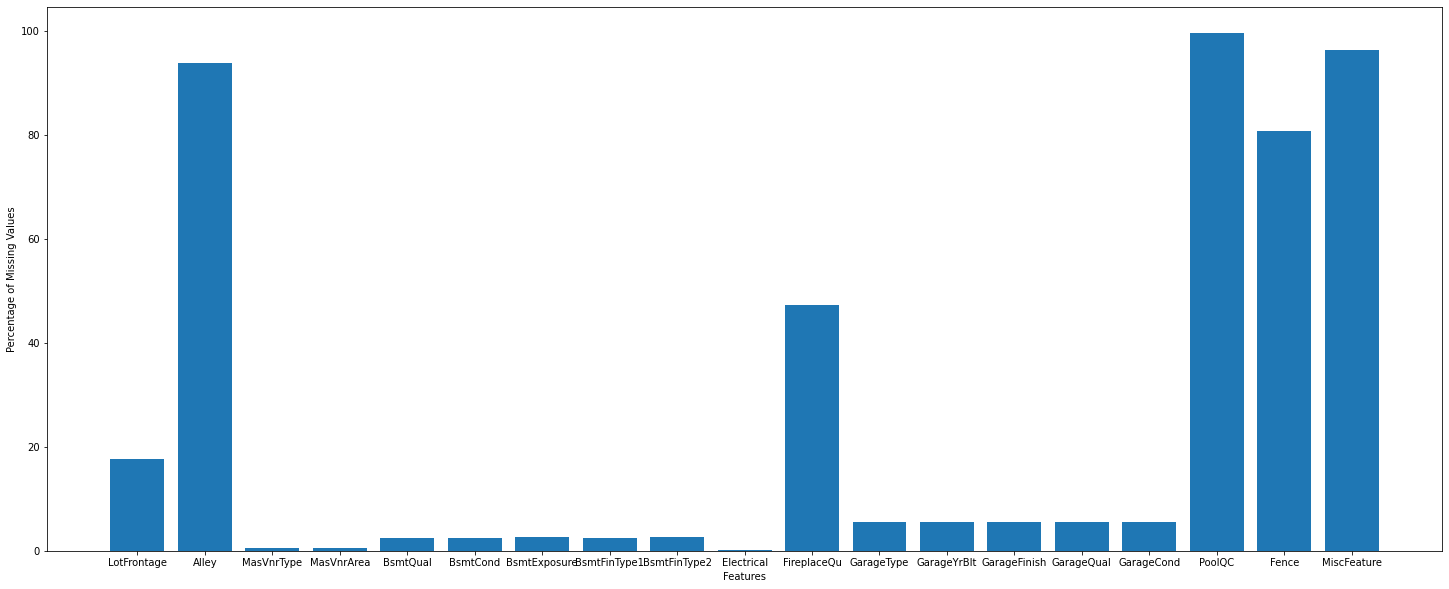

In [7]:
# Plotting Bar-plot of Features with missing values and its missing percentages

y=Features_wmv.values()
x=Features_wmv.keys()


plt.figure(figsize=(25,10))
plt.bar(x=x, height=y)
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Features")
plt.show()


In [8]:
# Generating dataframe of columns with missing values

MVDF = data[Features_wmv.keys()]
MVDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


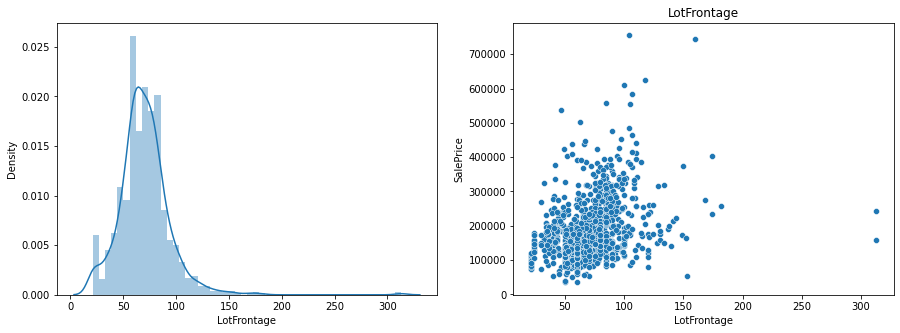

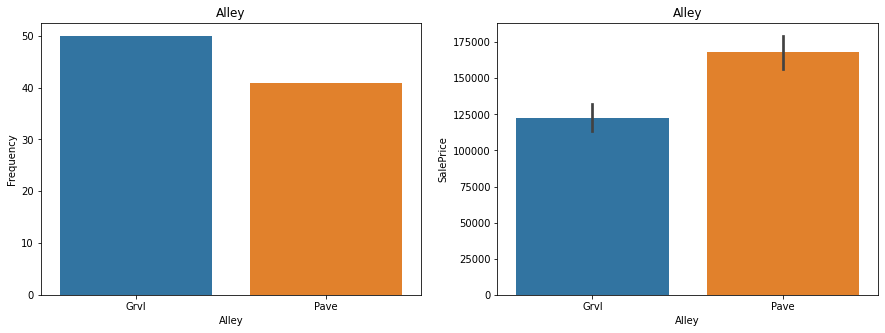

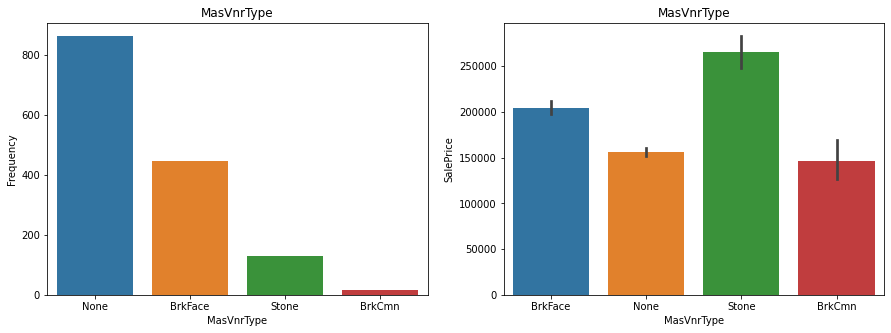

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


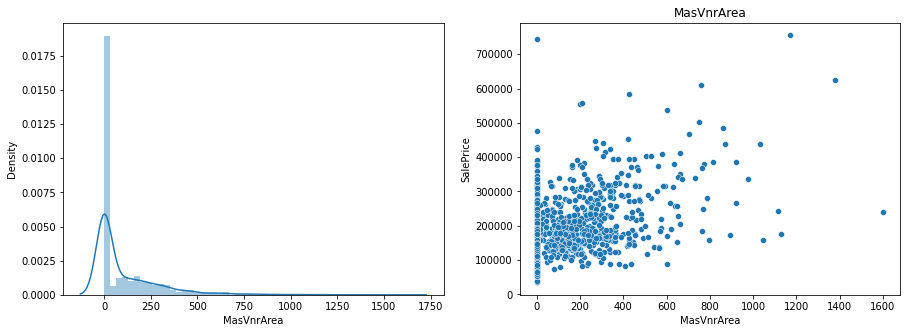

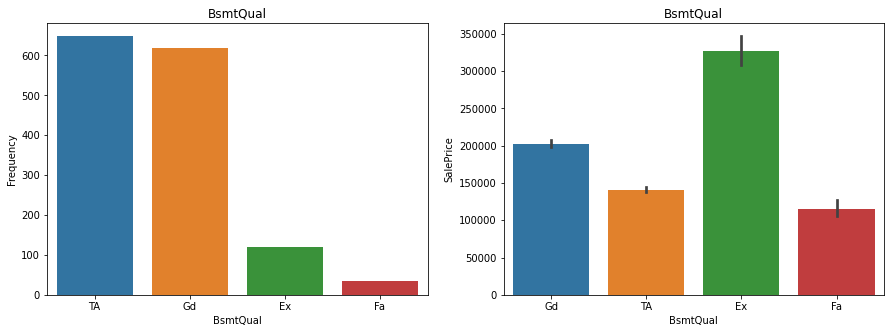

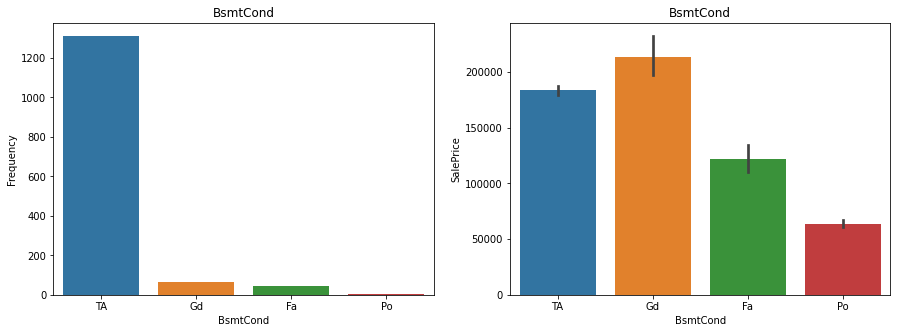

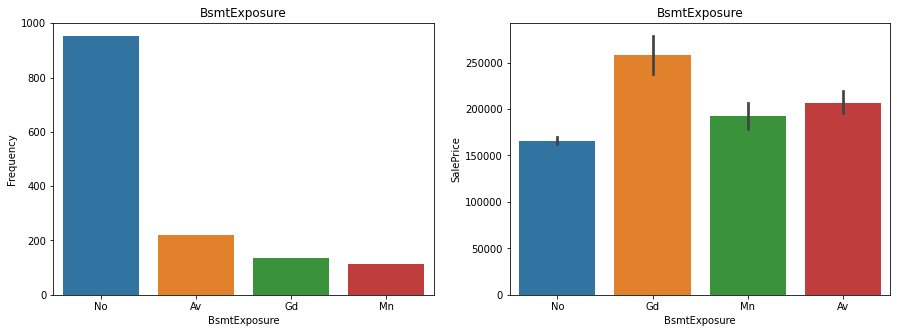

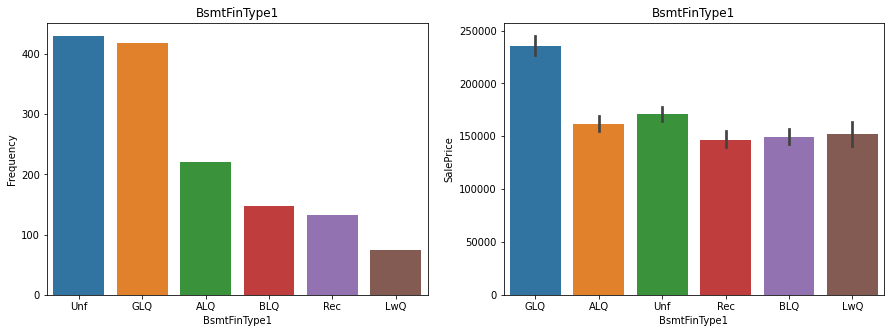

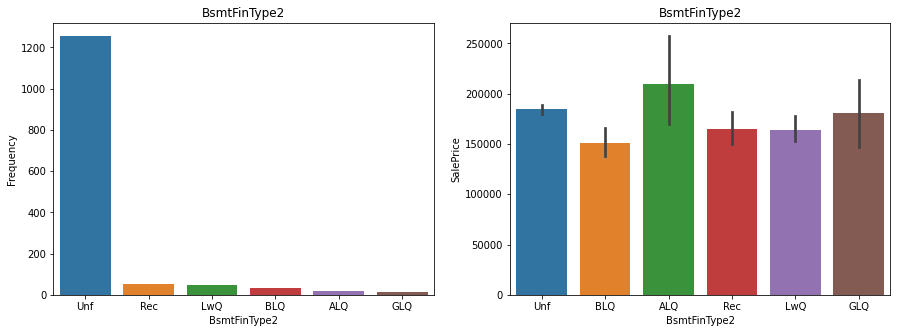

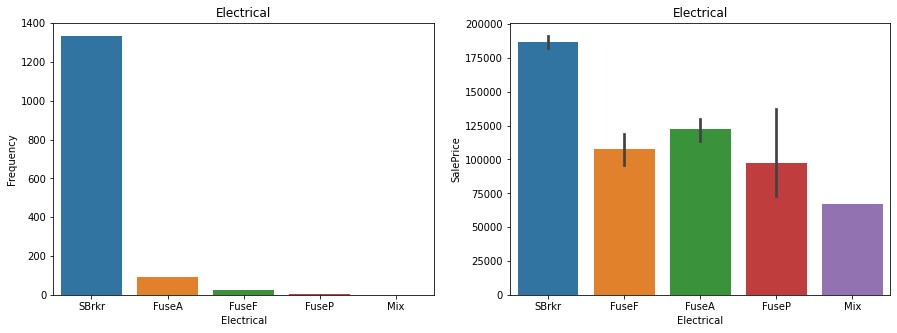

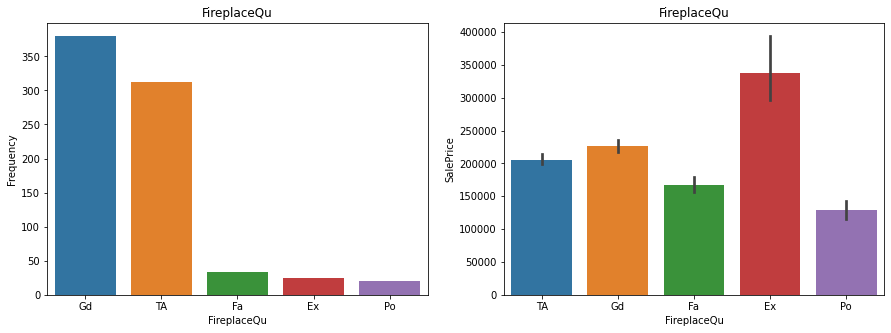

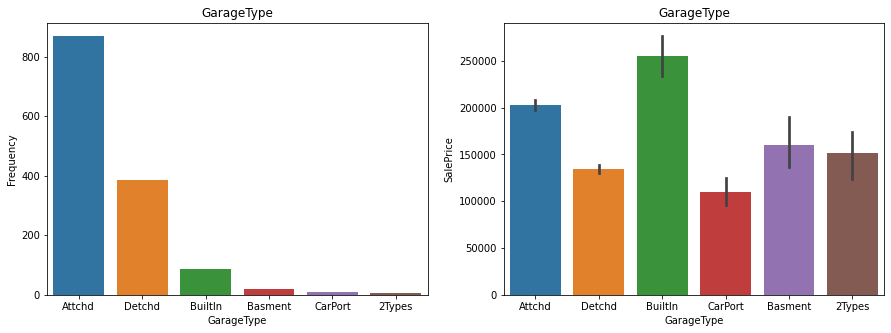

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


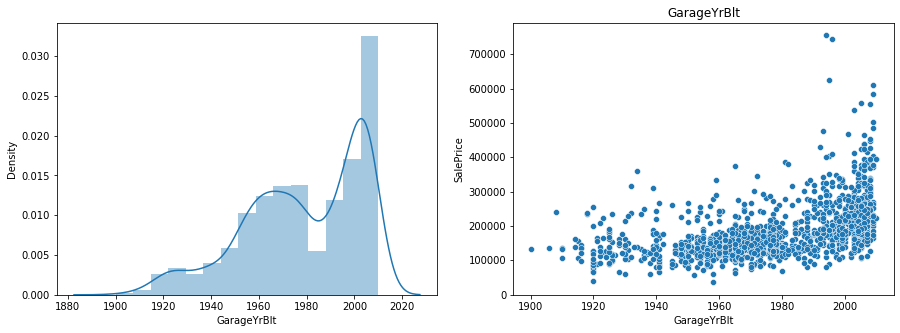

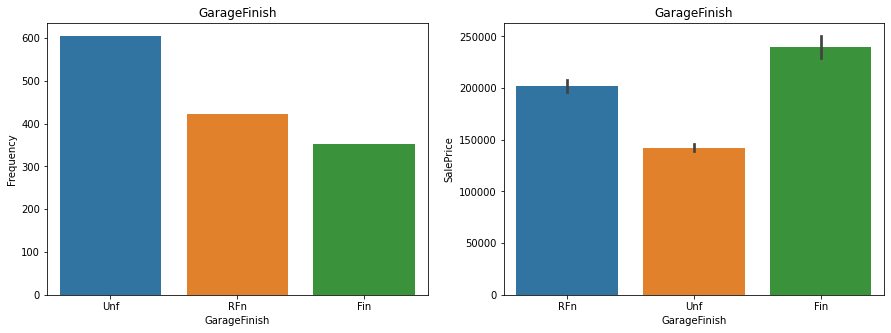

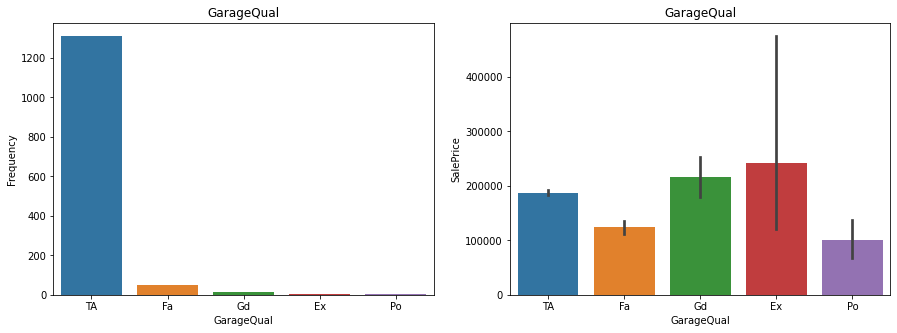

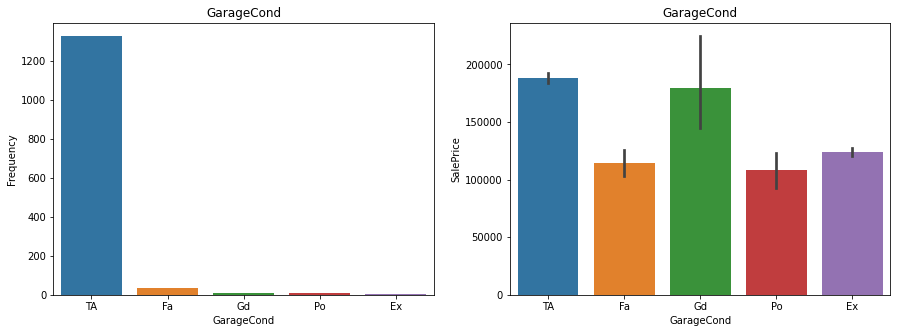

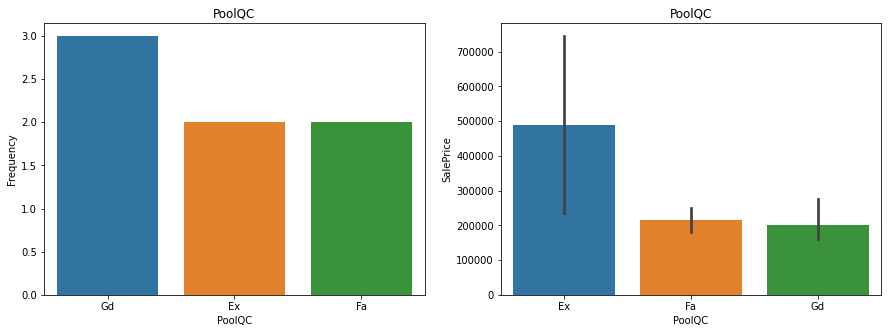

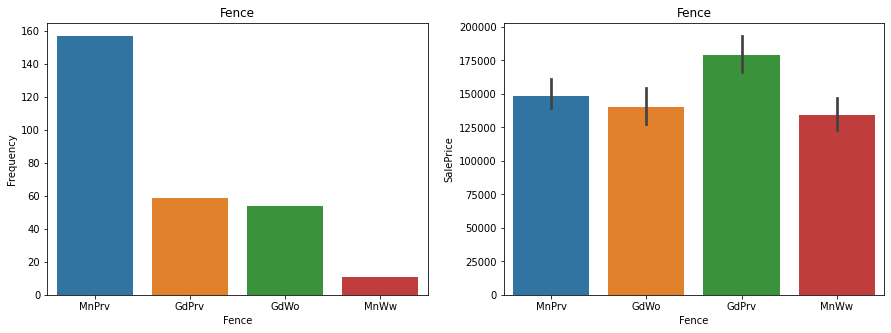

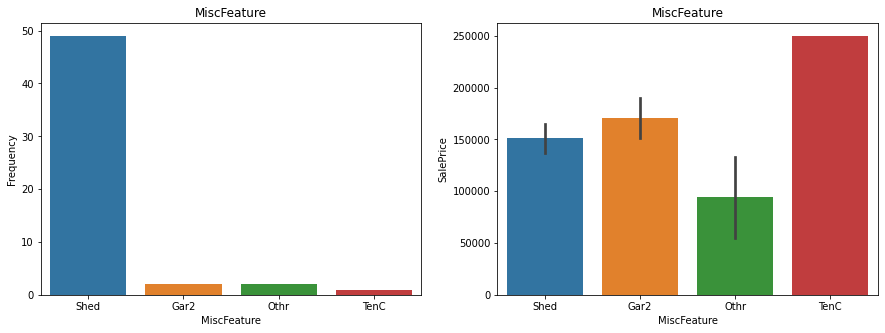

In [9]:
# Plotting Frequency Bar-plot and Bar-plot against SalePrice for better understanding of the features

for feature in MVDF.columns:
  if MVDF[feature].dtype=='O':
    a = data[feature].value_counts()
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.barplot(x=a.index,y=a.values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.title(feature)
    plt.subplot(1,2,2)
    sns.barplot(x=data[feature],y=data['SalePrice'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

  else:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(x=data[feature])
    plt.xlabel(feature)

    plt.subplot(1,2,2)
    sns.scatterplot(x=data[feature],y=data["SalePrice"])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [10]:
# copying data into another variable for our convenience

data_copy = data.copy()
data_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Data Cleaning

In [11]:
# Dropping columns with more than 6% of the missing data because if we keep those columns they will only increase inaccuracy in the dataset

data_copy.drop(columns=[column for column in Features_wmv.keys() if Features_wmv[column]>6], inplace=True)

# Also dropping the "Id" column because it only consist of Sr.No. 

data_copy.drop(columns=["Id"], inplace=True)
data_copy

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [12]:
# Filling missing values in the dataset
# we will fill missing values of features with categorical values with "mode" of the feature
# And Features with numerical value will be filled with "mean" of the feature
 
cols = [column for column in Features_wmv.keys() if Features_wmv[column]<=6]
cols
for column in cols:
  if data_copy[column].dtype=='O':
    data_copy[column].fillna(value=data_copy[column].mode()[0],inplace=True)
  else:
    data_copy[column].fillna(value=data_copy[column].mean(),inplace=True)

In [13]:
# Checking if there remain any missing values in dataset
 
data_copy[cols].isna().sum()

MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [14]:
# Making new variable with cleaned dataset 

cleaned_data = data_copy.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Exploratory Data Analysis

In [15]:
# creating dataframe with categorical features

continuous_features_df = data[[feature for feature in cleaned_data.columns if cleaned_data[feature].dtype!='O']]
continuous_features_df.dtypes

MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


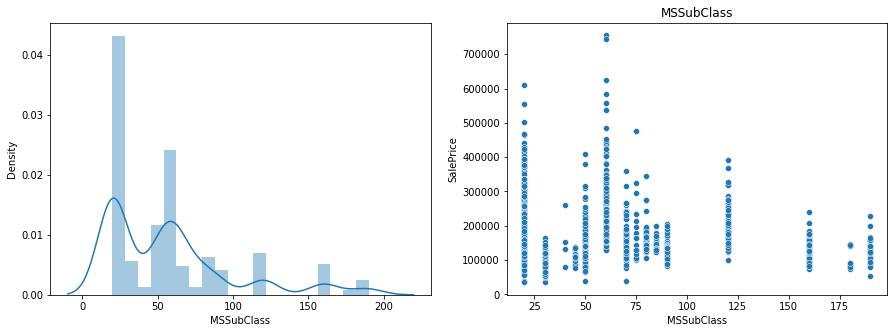

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


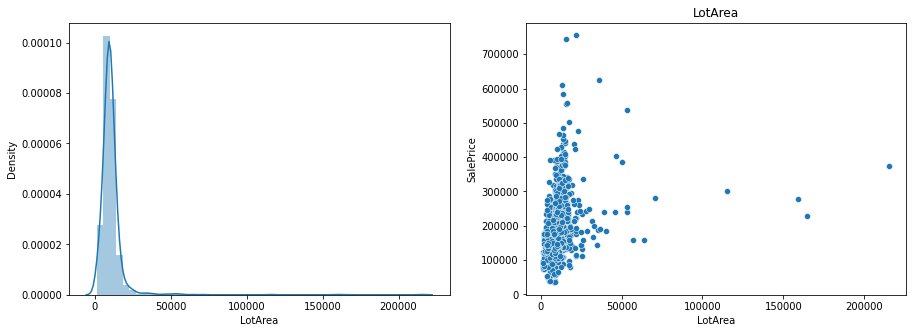

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


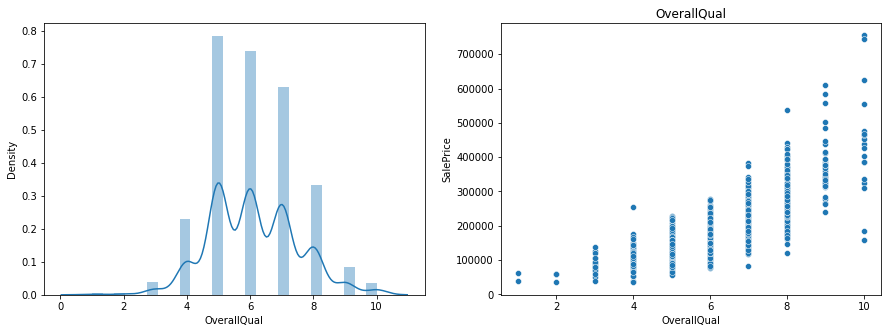

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


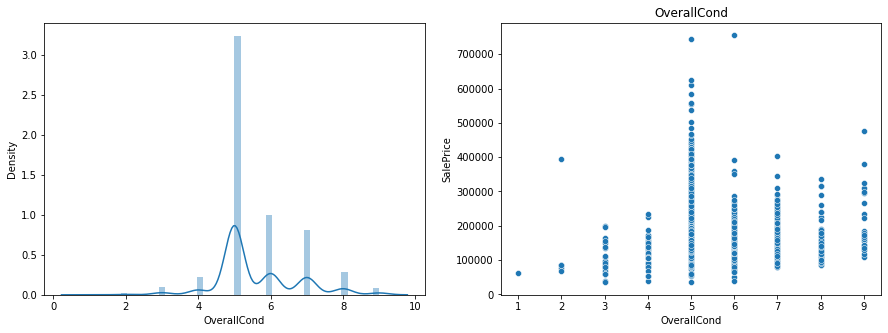

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


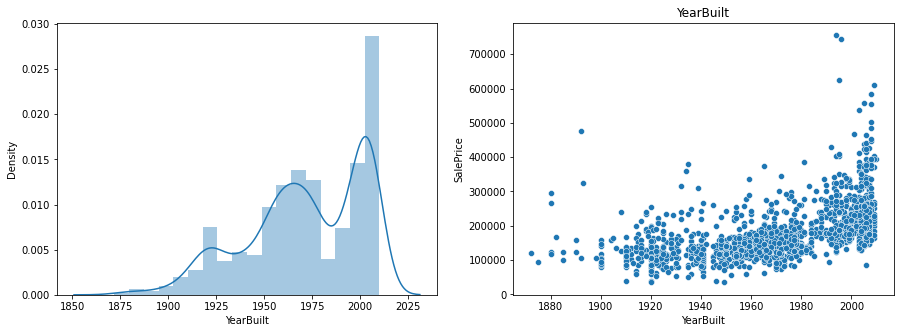

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


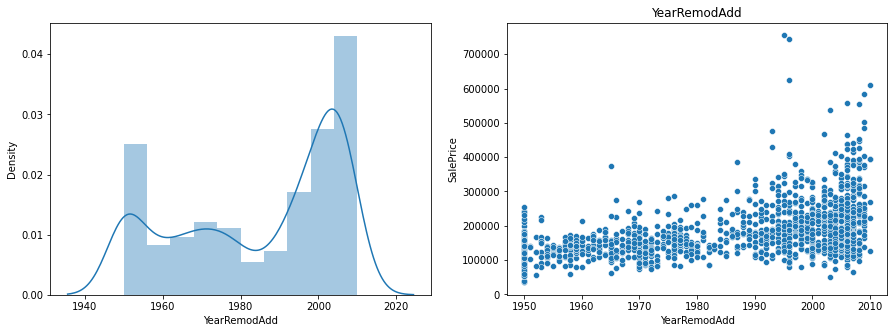

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


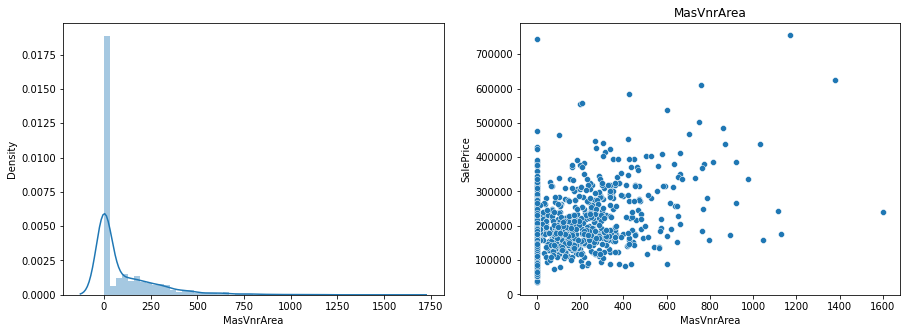

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


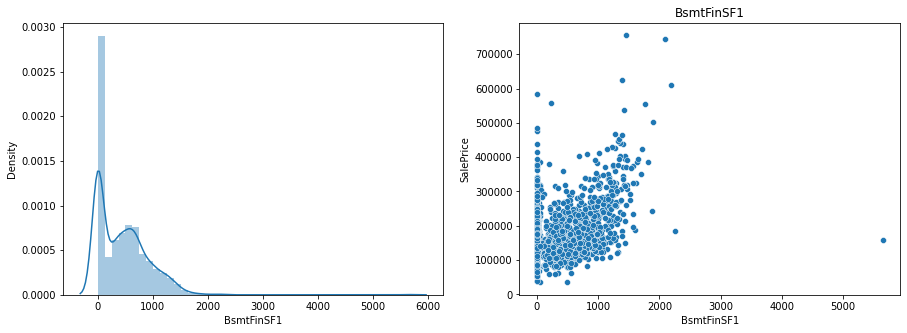

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


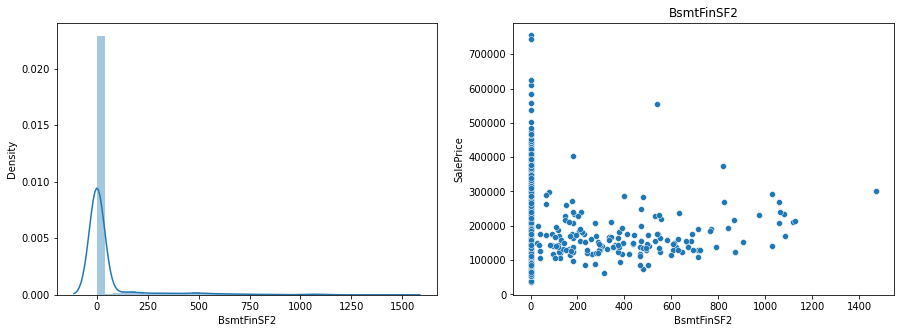

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


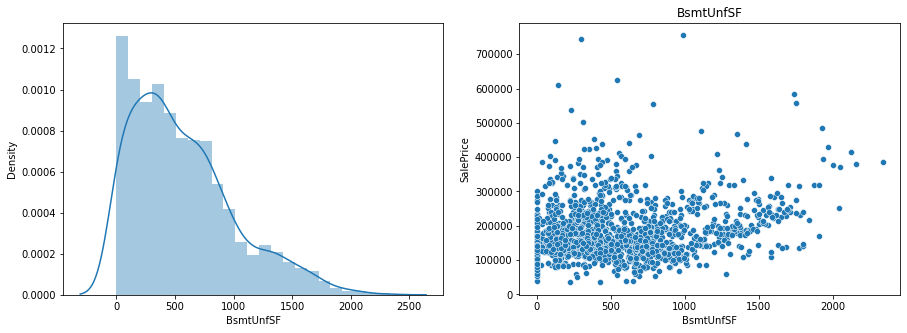

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


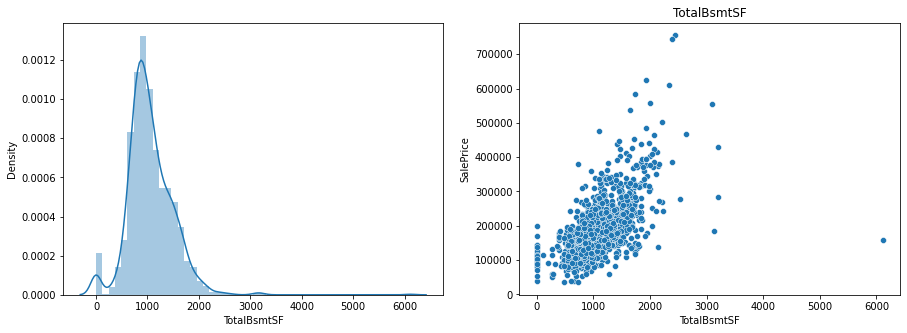

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


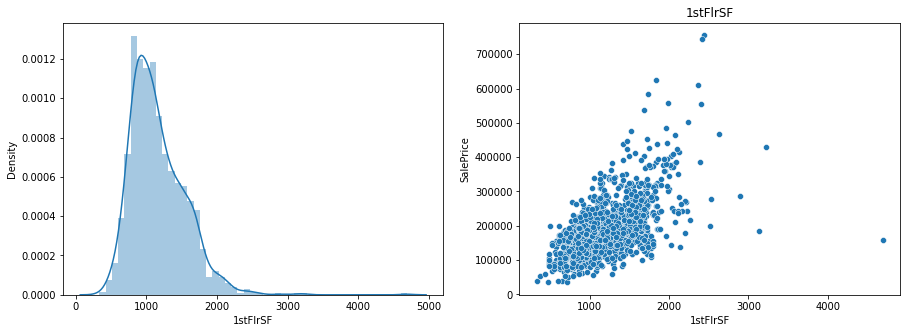

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


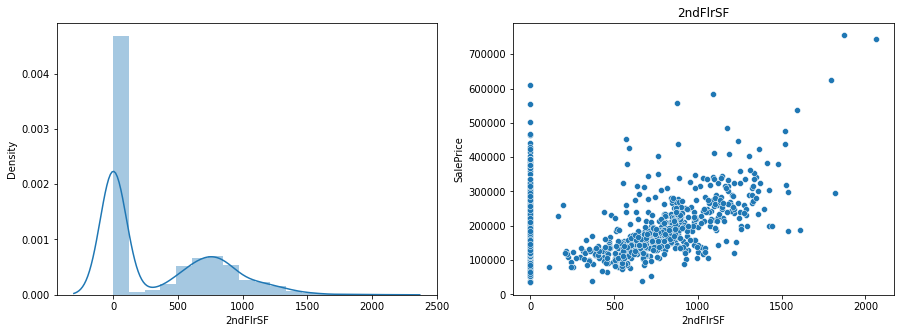

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


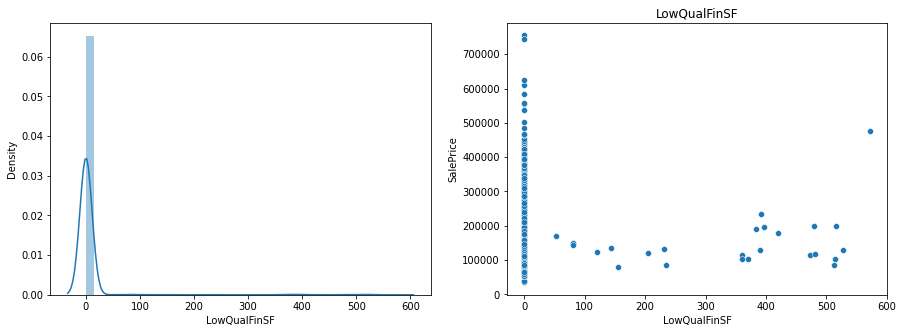

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


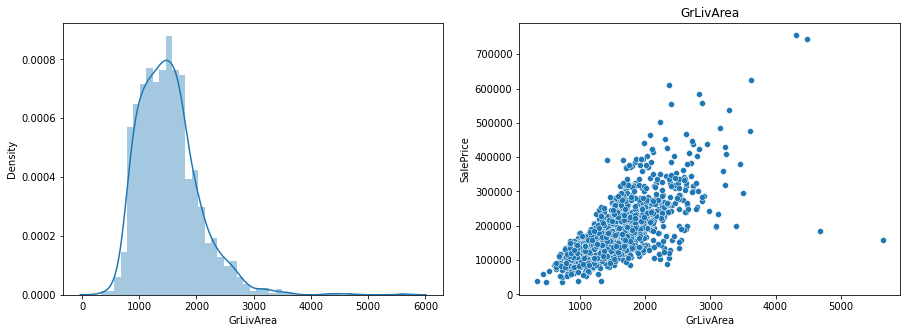

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


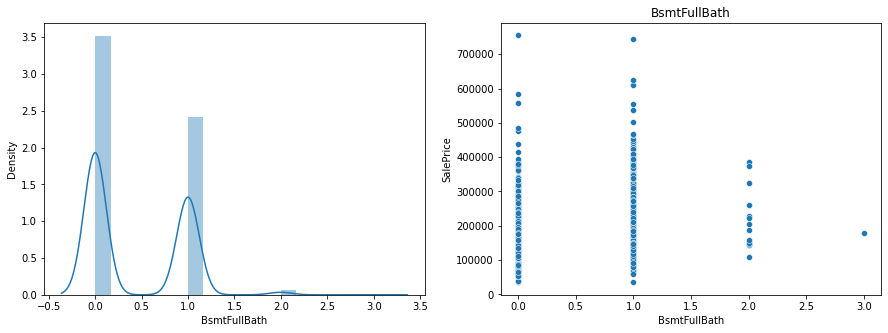

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


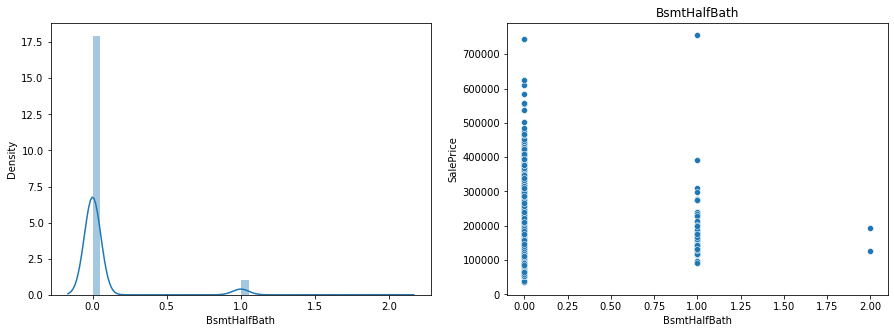

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


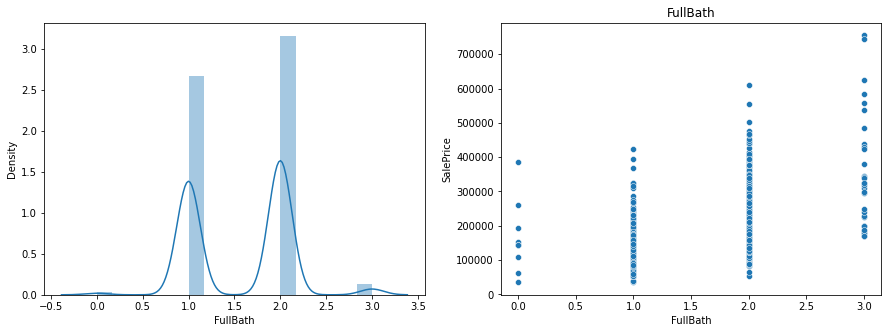

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


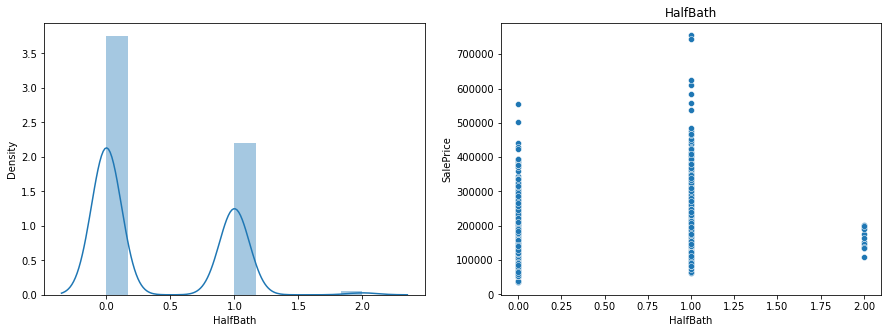

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


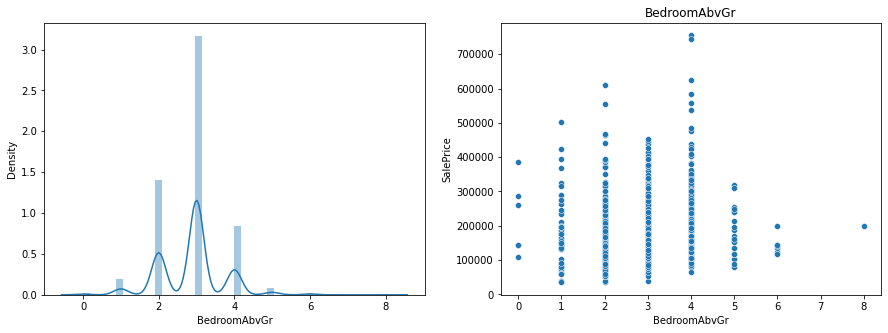

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


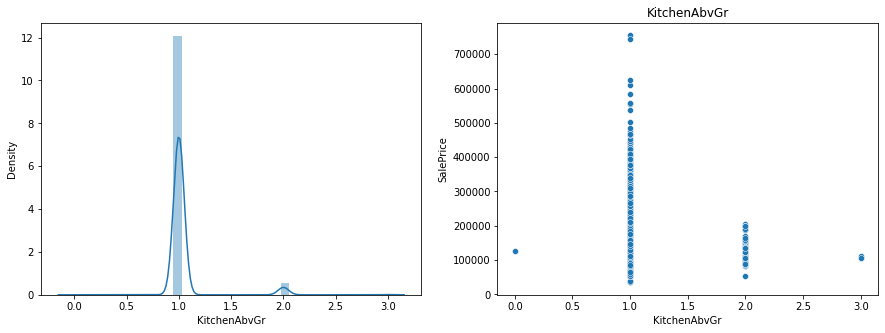

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


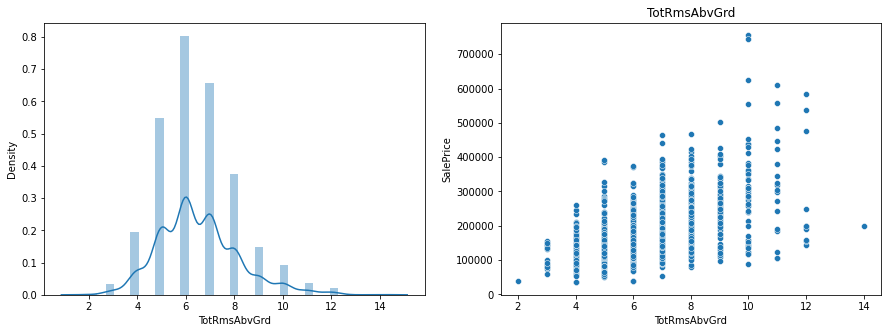

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


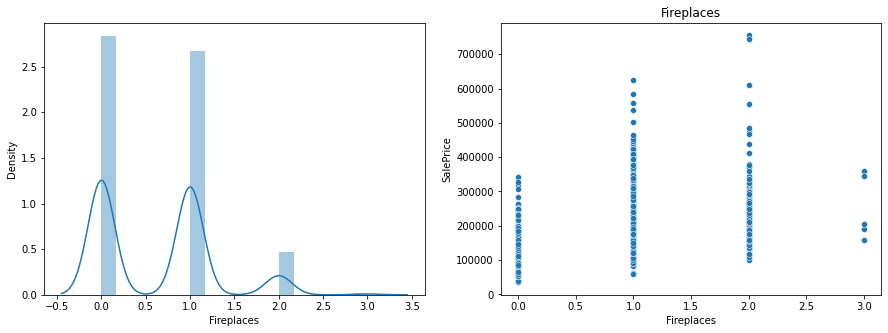

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


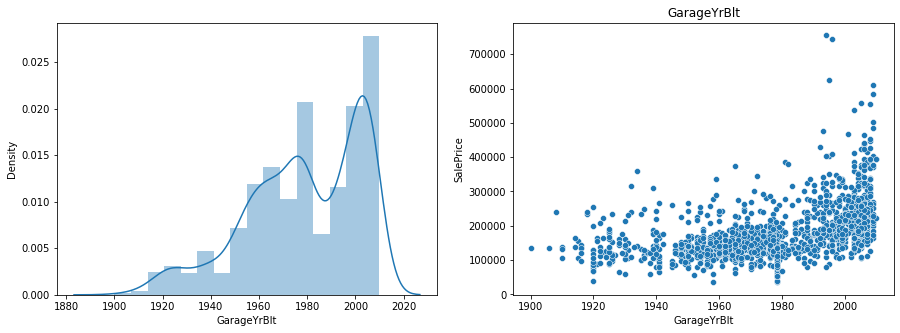

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


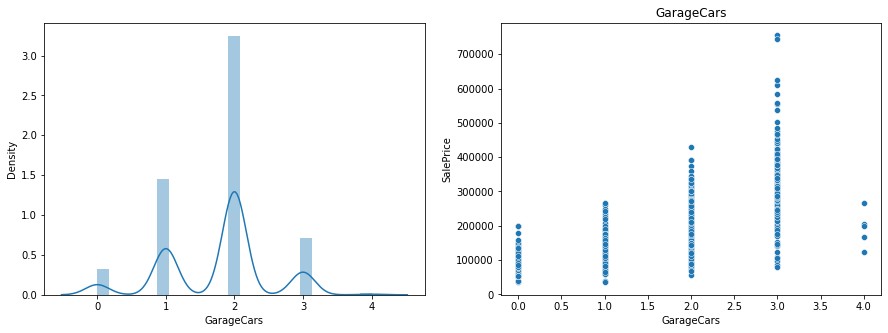

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


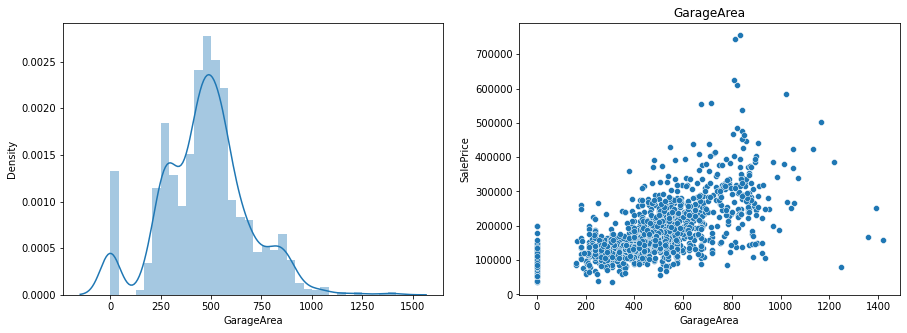

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


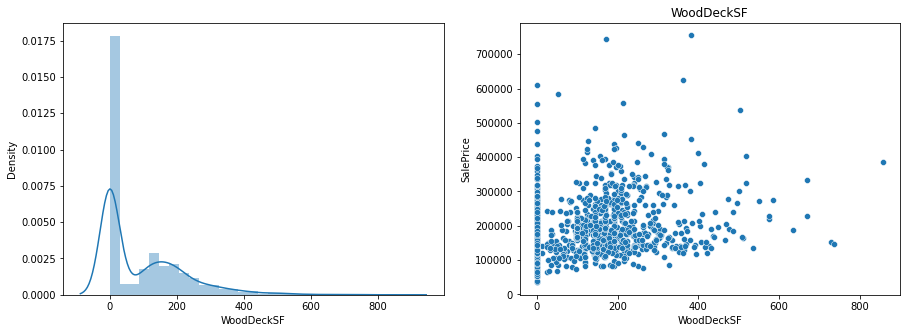

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


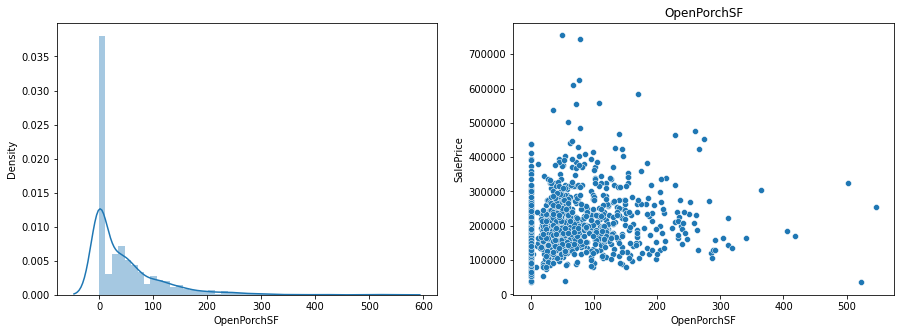

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


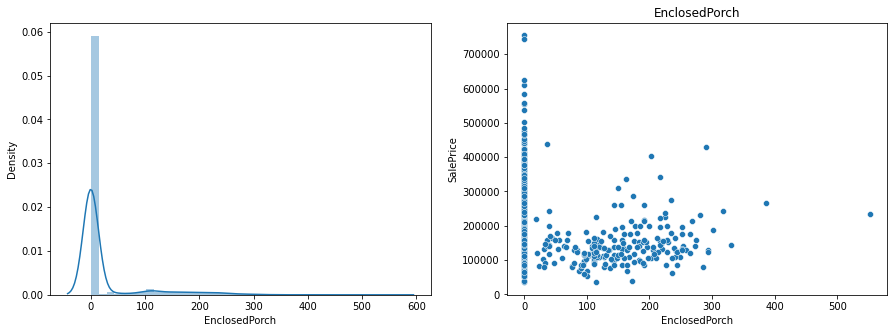

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


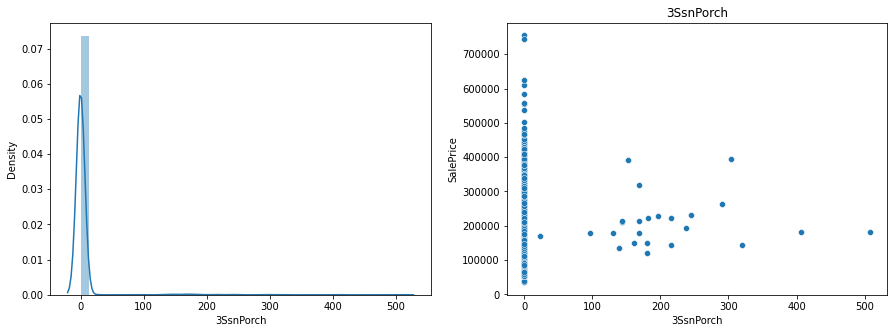

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


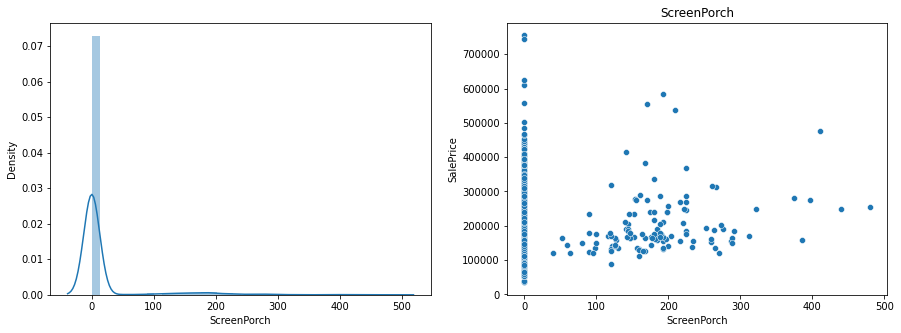

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


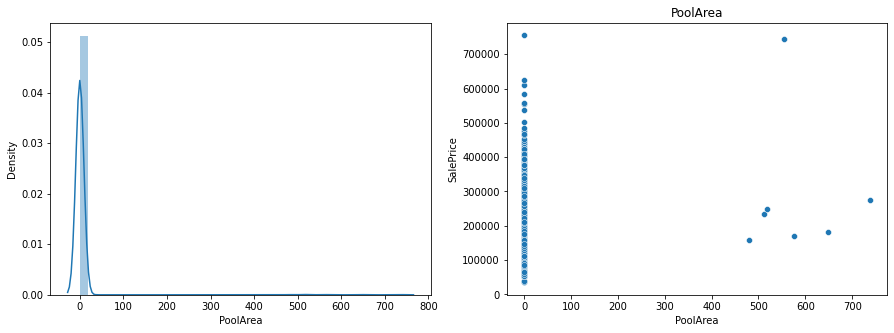

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


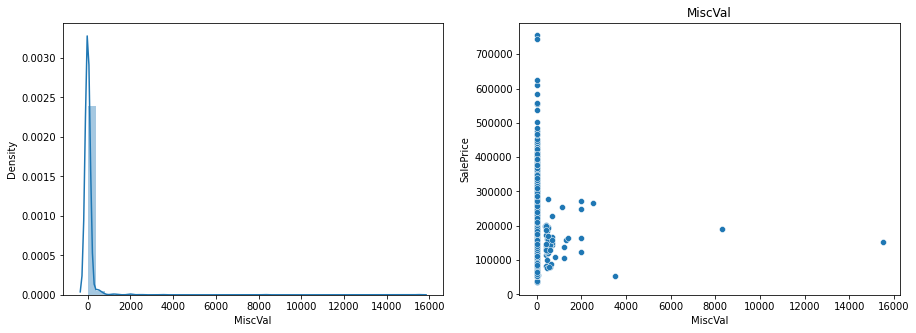

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


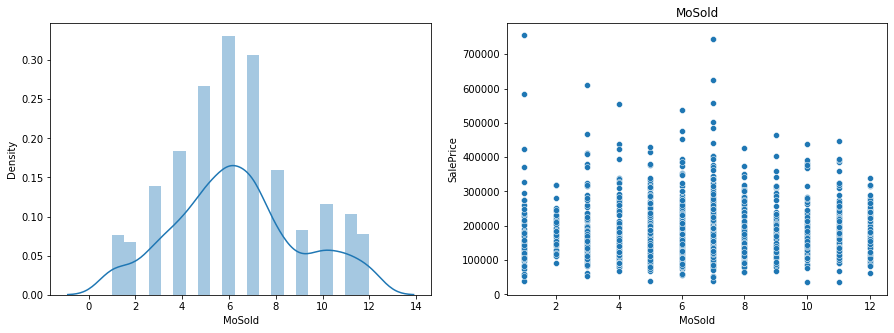

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


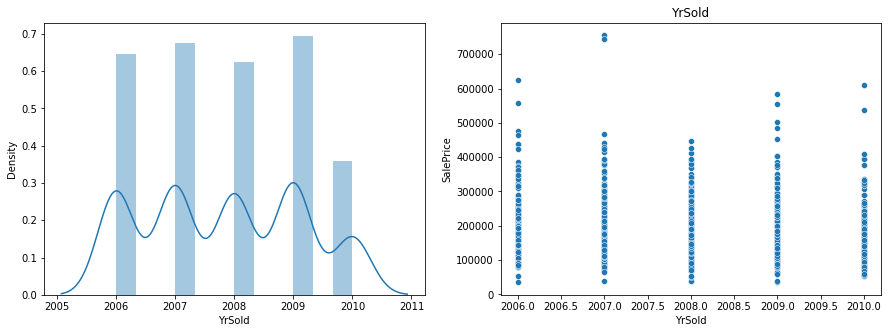

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


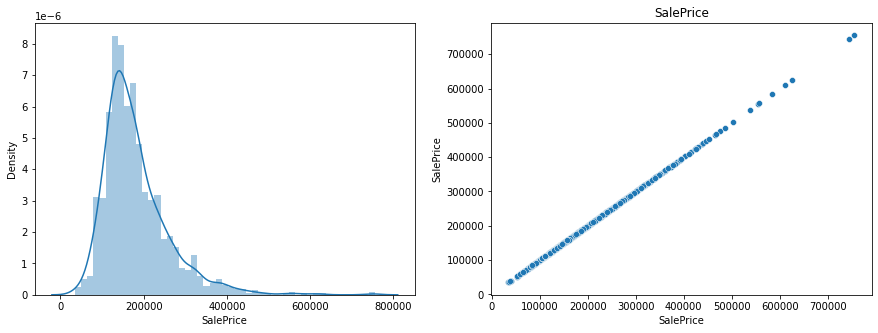

In [16]:
# plotting Histogram and Scatterplot against SalePrice for better understanding of the continuous features

for feature in continuous_features_df.columns:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.distplot(x=cleaned_data[feature])
  plt.xlabel(feature)

  plt.subplot(1,2,2)
  sns.scatterplot(x=cleaned_data[feature],y=cleaned_data["SalePrice"])
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel("SalePrice")
  plt.show()

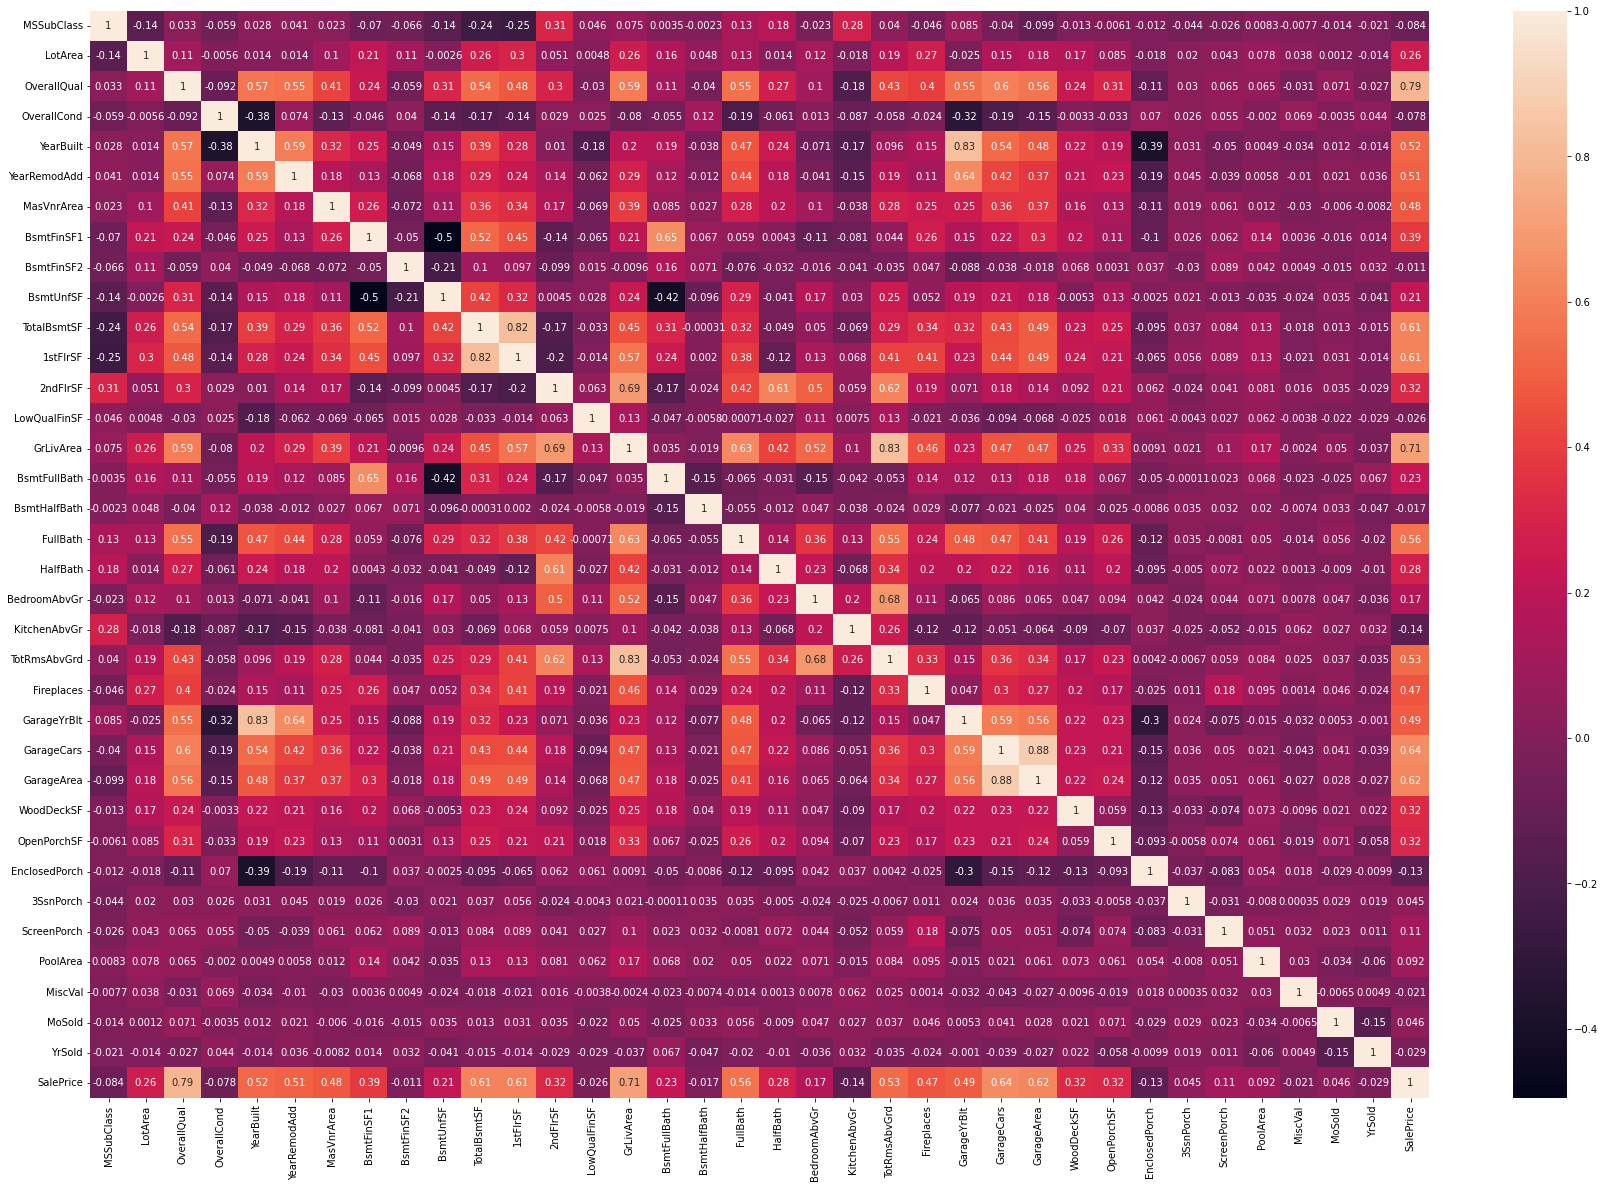

In [17]:
# plotting heatmap of correlation between numerical variables to understand relation between them

corr = continuous_features_df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [18]:
# creating dataframe with continuous features

categorical_features_df = data[[feature for feature in cleaned_data.columns if cleaned_data[feature].dtype=='O']]
categorical_features_df.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

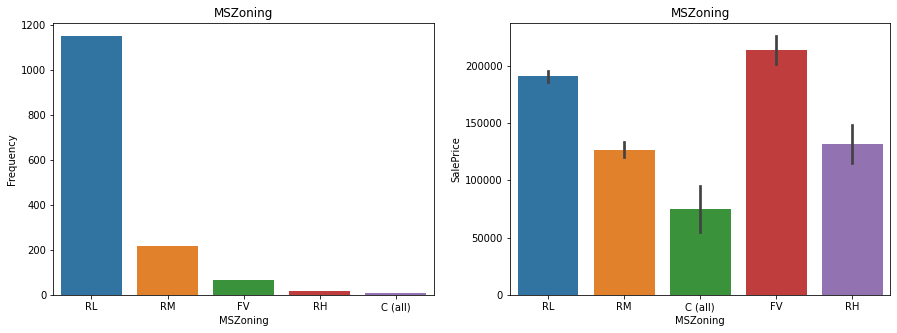

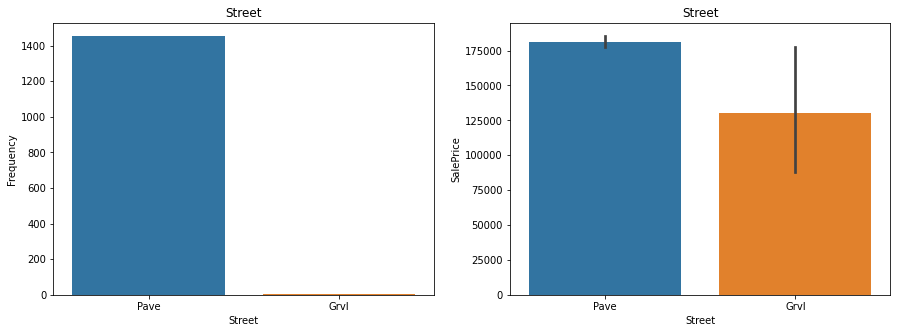

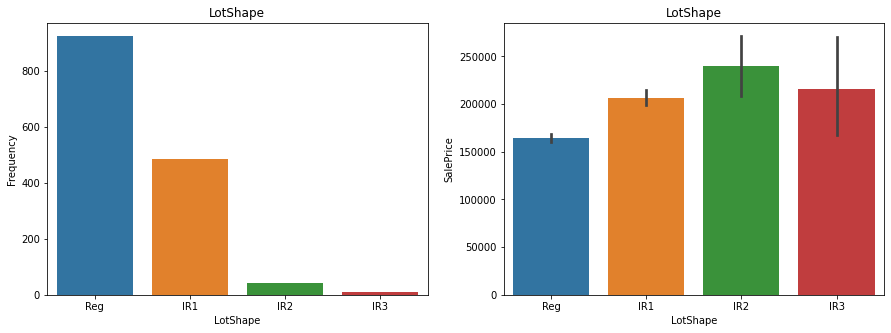

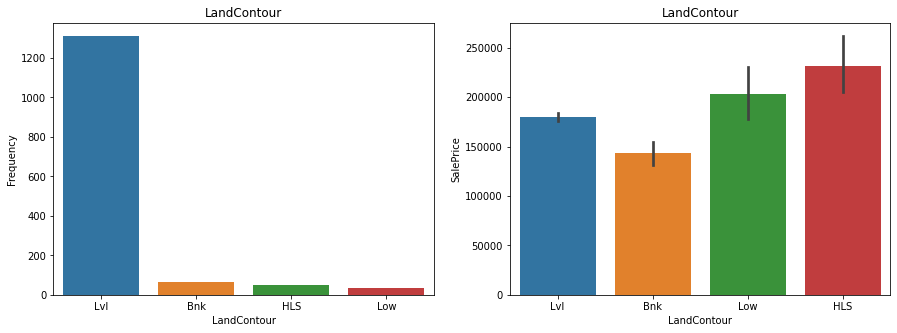

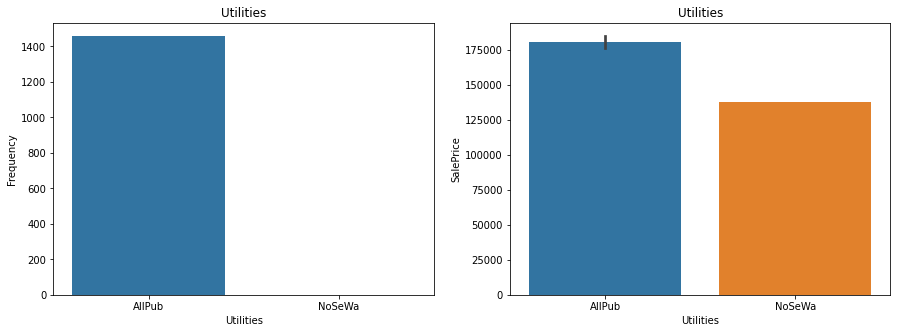

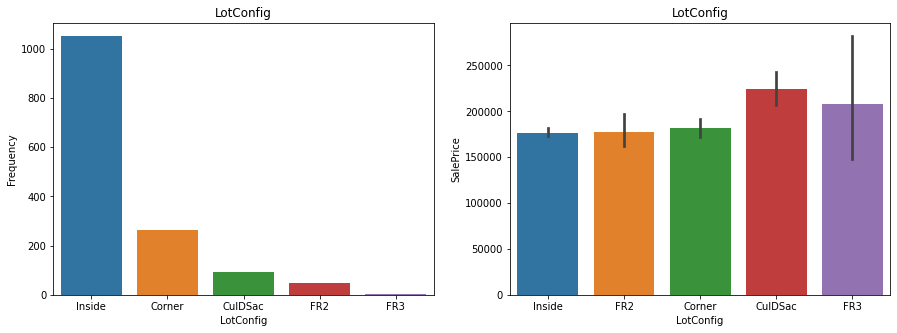

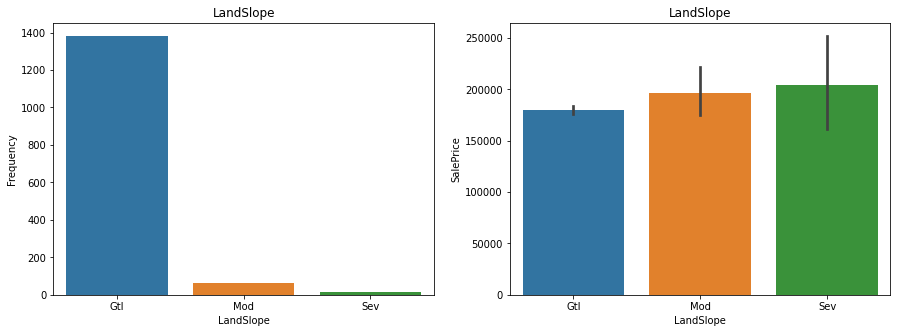

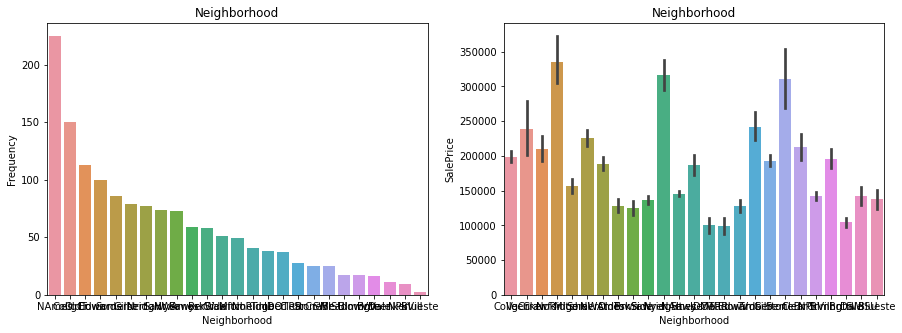

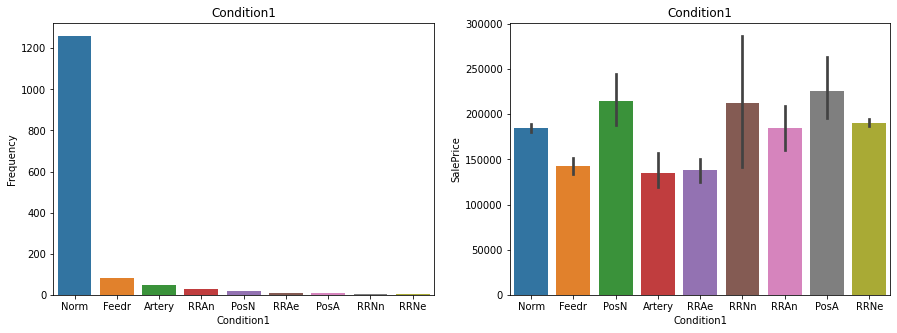

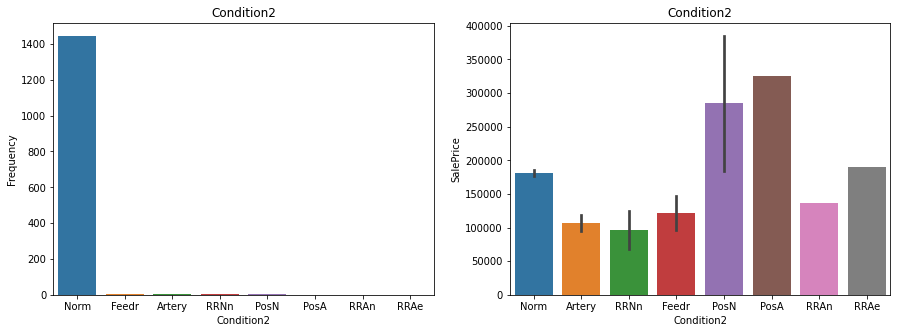

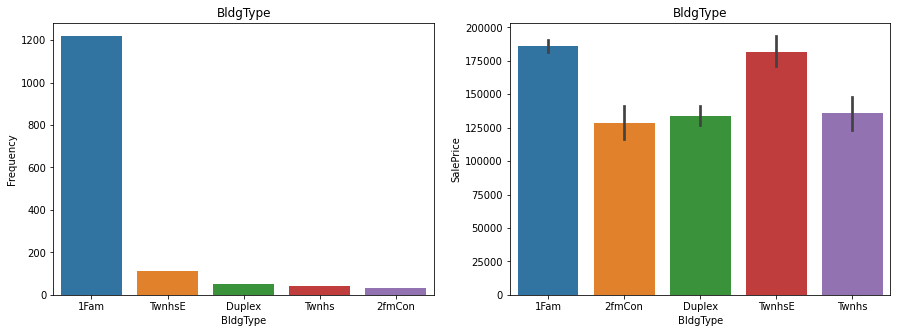

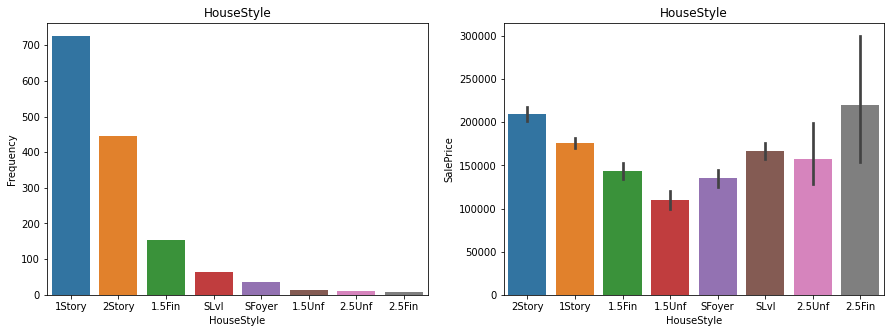

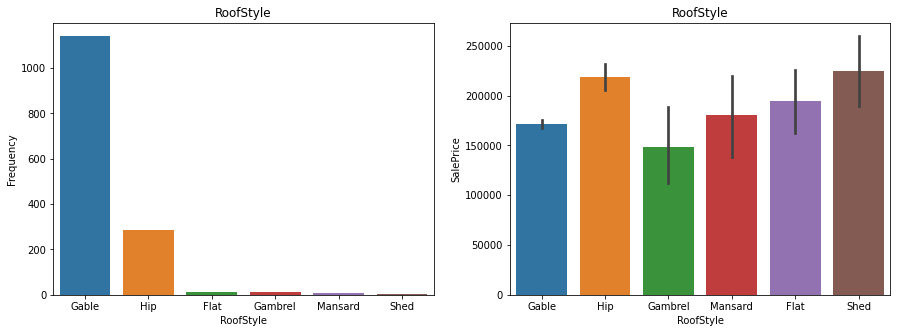

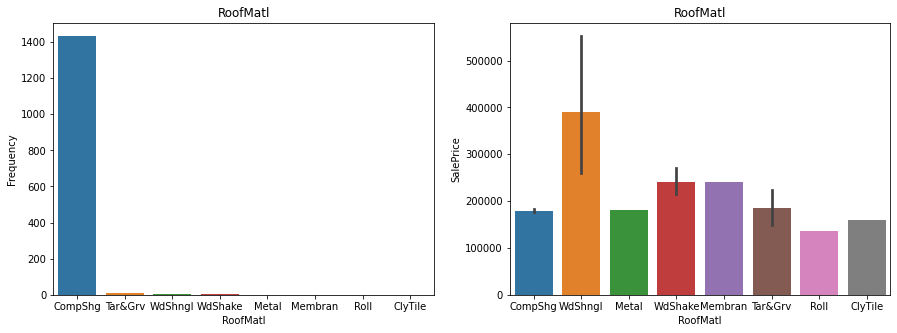

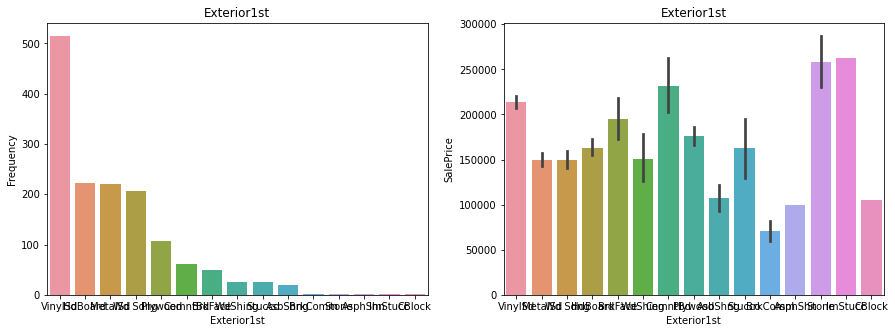

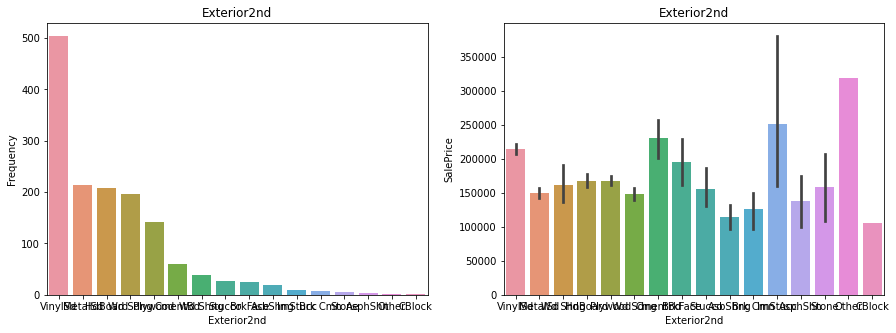

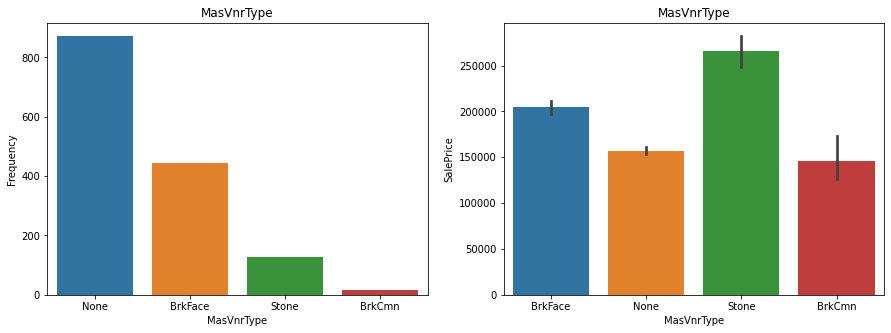

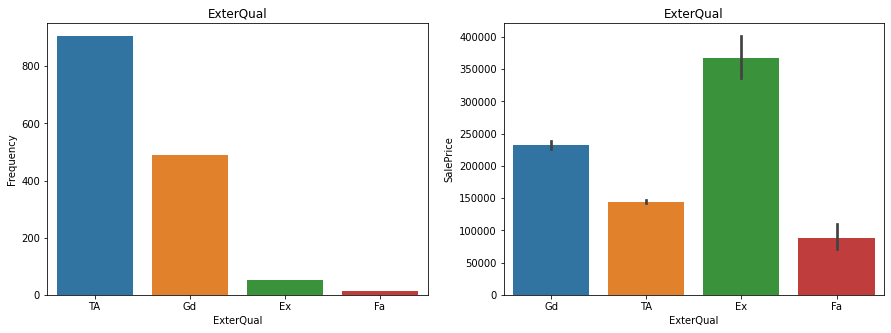

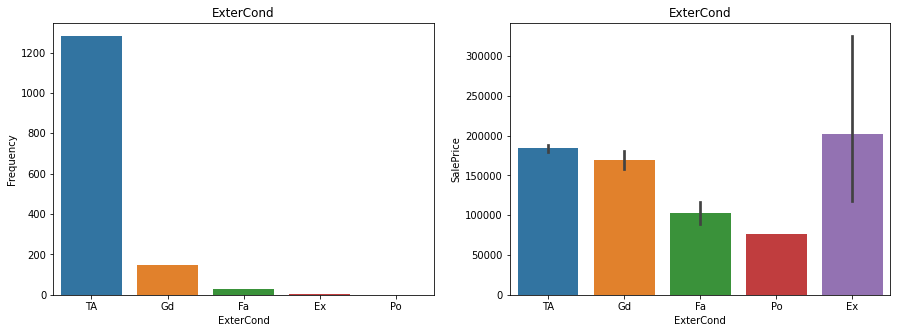

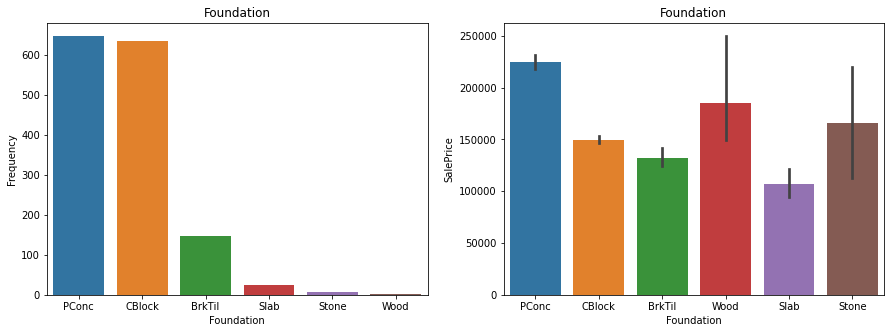

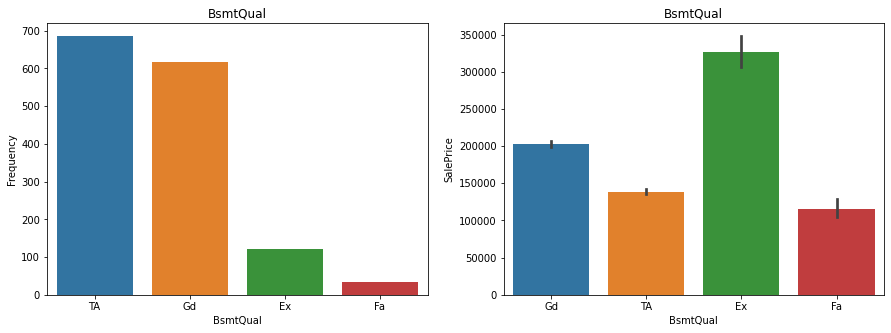

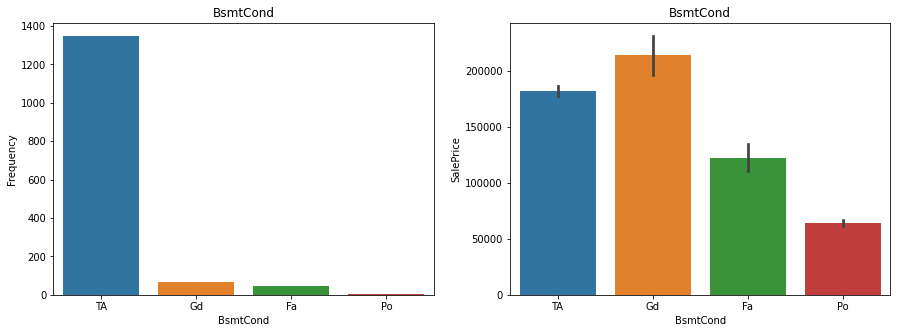

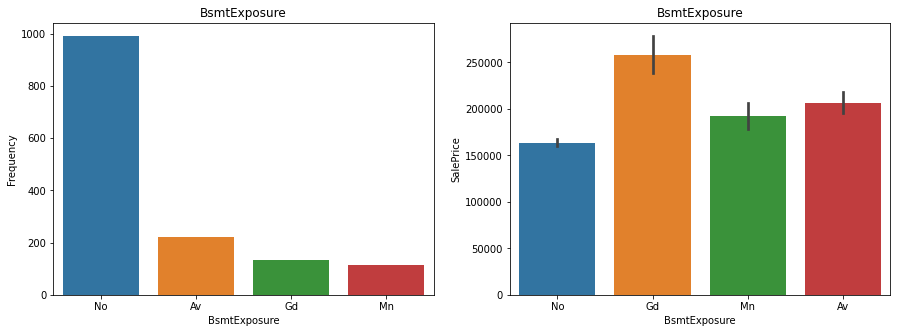

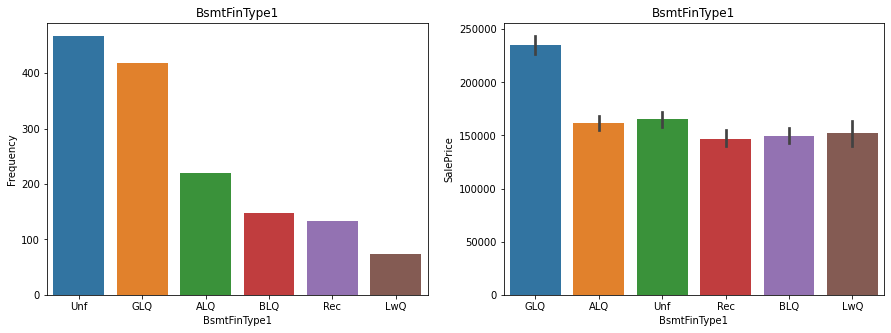

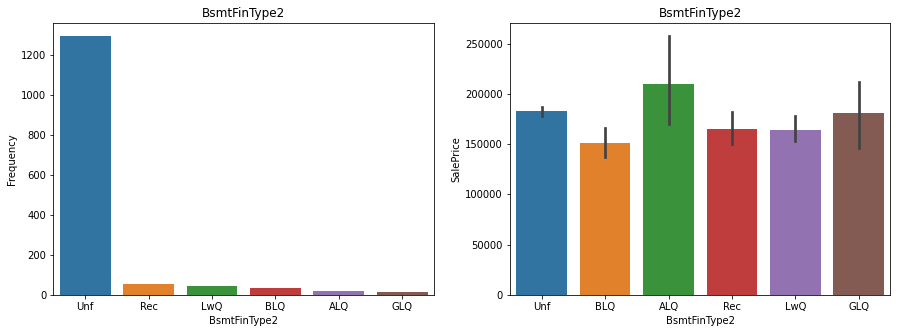

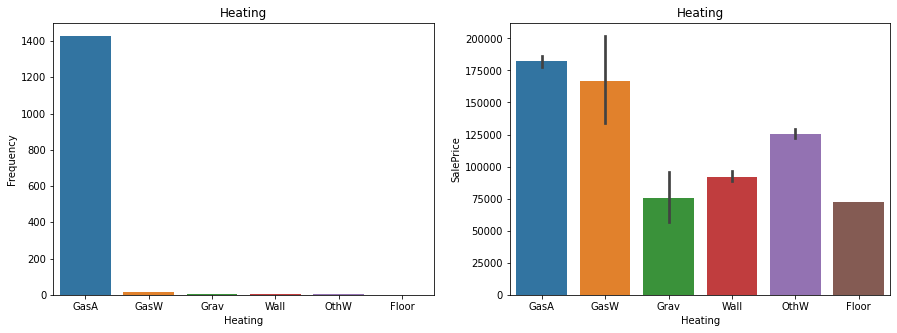

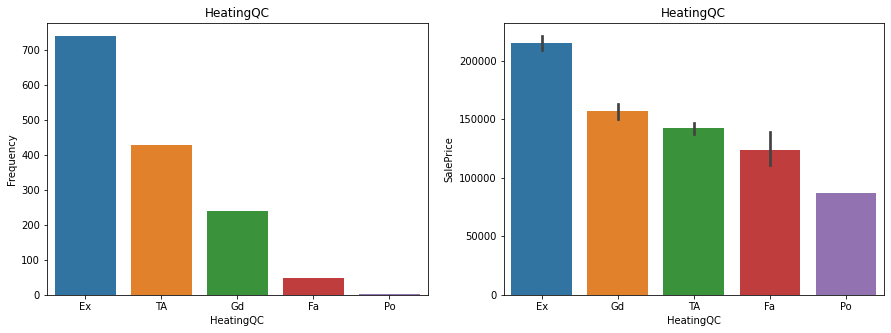

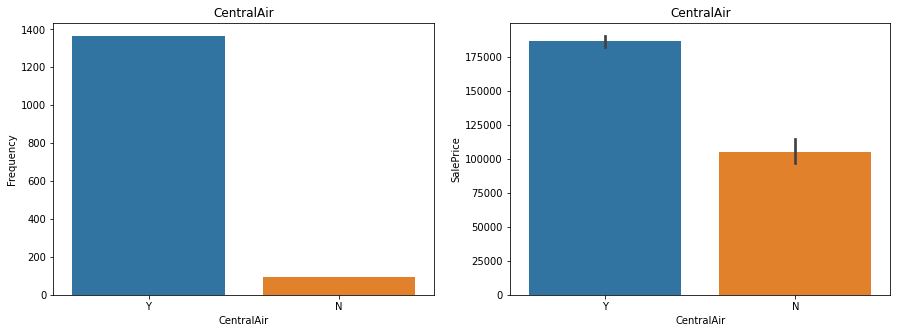

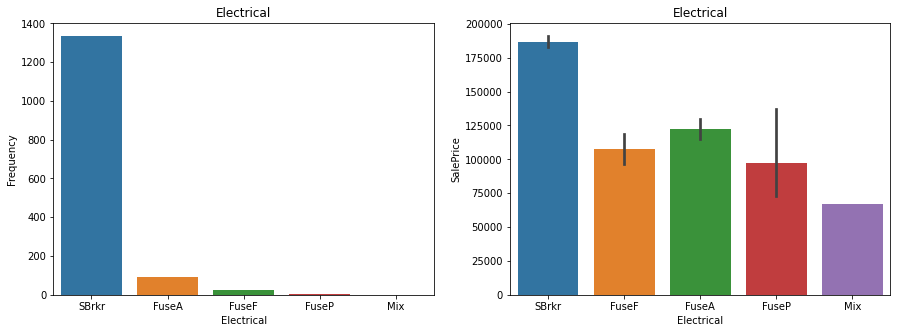

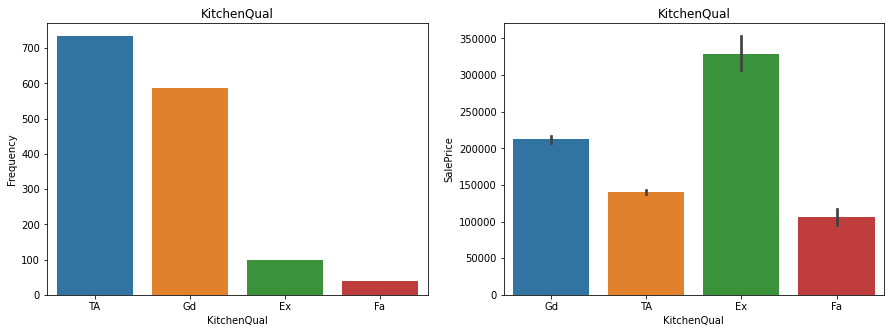

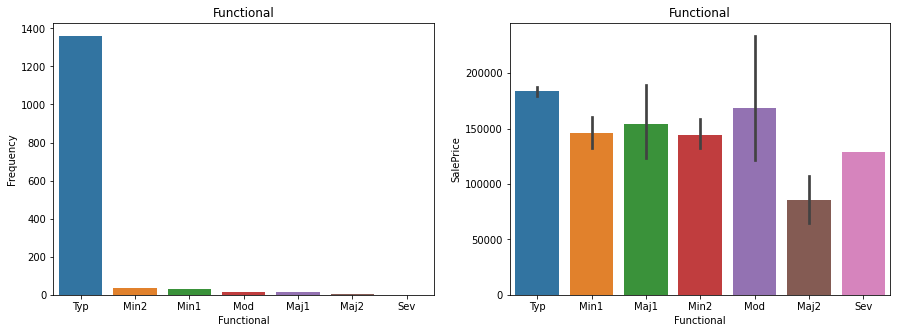

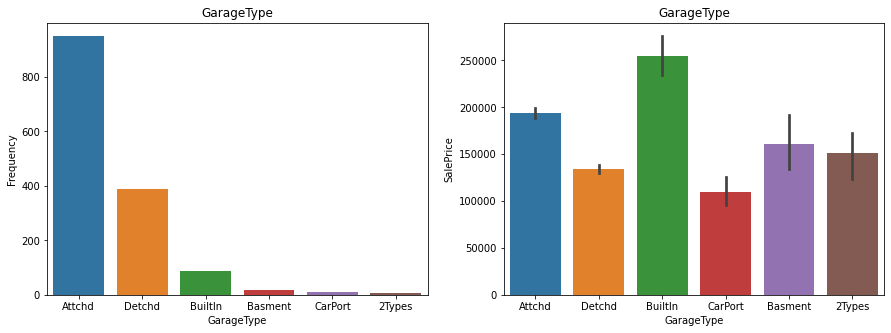

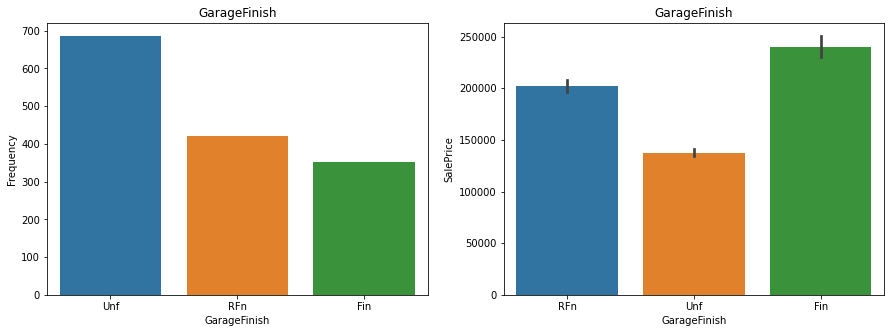

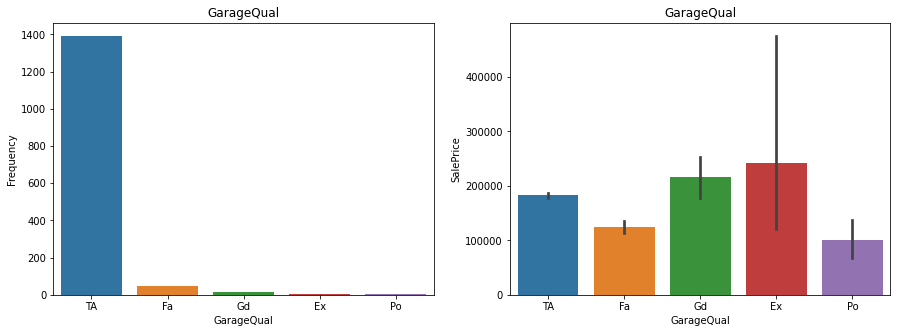

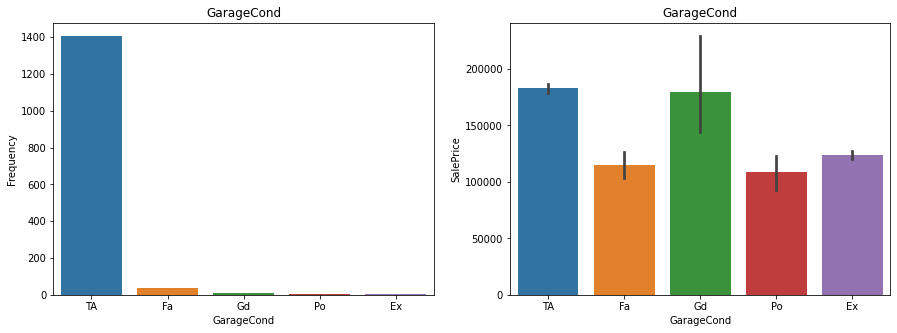

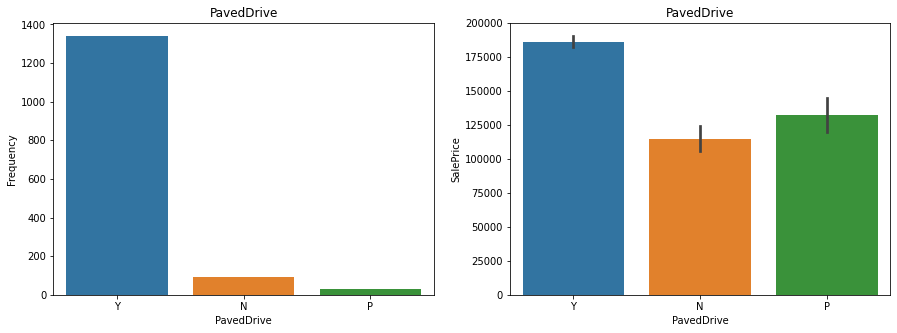

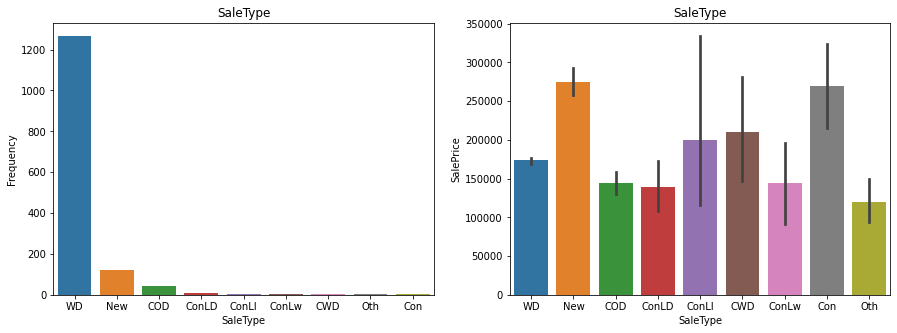

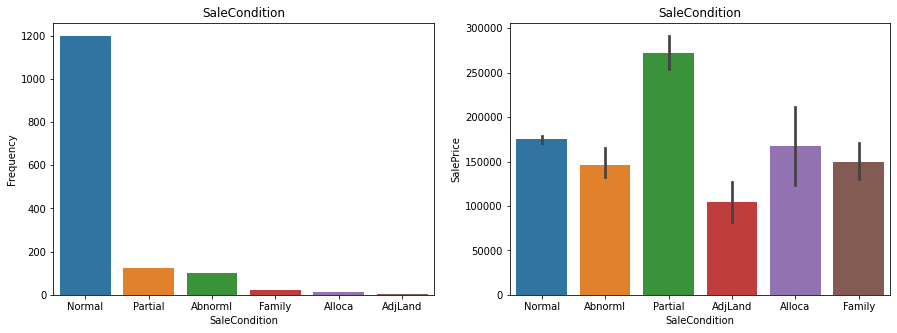

In [19]:
# plotting Frequency Bar-plot and Bar-plot against SalePrice for better understanding of the categorical features

for feature in categorical_features_df.columns:
  a = cleaned_data[feature].value_counts()
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.barplot(x=a.index,y=a.values)
  plt.xlabel(feature)
  plt.ylabel("Frequency")

  plt.title(feature)
  plt.subplot(1,2,2)
  sns.barplot(x=cleaned_data[feature],y=cleaned_data['SalePrice'])
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel("SalePrice")

  plt.show()

## Encoding of Categorical variables 


*   Some of the categorical variables are on ordinal scales that's why we can't use one-hot encoding on Every categorical features.

*   From the Frequency bar plot and bar plot of categorical variables against salePrice we can say that even if categorical feature is on ordinal scale and  if frequencies of other categories in categorical feature are far less than one category then we can't use LabelEncoding (ordinal scale) on that feature.

*   There are some features in dataset on which we can use Mapping/LabelEncoding and there are some on which we have to use one-hot encoding






In [20]:

# Street={'Pave':1 , 'Grvl':0}
# ExterQual={'Gd':2, 'TA':1, 'Ex':3, 'Fa':0}
# ExterCond={'TA':2, 'Gd':3, 'Fa':1, 'Po':0, 'Ex':4}
# BsmtQual={'Gd':2, 'TA':1, 'Ex':3, 'Fa':0}
# BsmtCond={'TA':2, 'Gd':3, 'Fa':1, 'Po':0}
# BsmtExposure={'No':0, 'Gd':3, 'Mn':1, 'Av':2}
# BsmtFinType1={'GLQ':5, 'ALQ':4, 'Unf':0, 'Rec':2, 'BLQ':3, 'LwQ':1}
# HeatingQC={'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}
# CentralAir={'Y':1, 'N':0}
# KitchenQual={'Ex':3, 'Gd':2, 'TA':1, 'Fa':0}
# GarageFinish={'RFn':1, 'Unf':0, 'Fin':2}
# GarageQual={'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}
# PavedDrive={'Y':2, 'N':0, 'P':1}


In [21]:
# Encoding Ordinal Categorical features with Mapping 

Mapping_Features = ["Street","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","HeatingQC","CentralAir","KitchenQual","GarageFinish","GarageQual","PavedDrive"]

cleaned_data["Street"]=cleaned_data["Street"].map({'Pave':1 , 'Grvl':0})
cleaned_data["Street"].astype(int)
cleaned_data["ExterQual"]=cleaned_data["ExterQual"].map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0})
cleaned_data["ExterQual"].astype(int)
cleaned_data["ExterCond"]=cleaned_data["ExterCond"].map({'TA':2, 'Gd':3, 'Fa':1, 'Po':0, 'Ex':4})
cleaned_data["ExterCond"].astype(int)
cleaned_data["BsmtQual"]=cleaned_data["BsmtQual"].map({'Gd':2, 'TA':1, 'Ex':3, 'Fa':0})
cleaned_data["BsmtQual"].astype(int)
cleaned_data["BsmtCond"]=cleaned_data["BsmtCond"].map({'TA':2, 'Gd':3, 'Fa':1, 'Po':0})
cleaned_data["BsmtCond"].astype(int)
cleaned_data["BsmtExposure"]=cleaned_data["BsmtExposure"].map({'No':0, 'Gd':3, 'Mn':1, 'Av':2})
cleaned_data["BsmtExposure"].astype(int)
cleaned_data["BsmtFinType1"]=cleaned_data["BsmtFinType1"].map({'GLQ':5, 'ALQ':4, 'Unf':0, 'Rec':2, 'BLQ':3, 'LwQ':1})
cleaned_data["BsmtFinType1"].astype(int)
cleaned_data["HeatingQC"]=cleaned_data["HeatingQC"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
cleaned_data["HeatingQC"].astype(int)
cleaned_data["CentralAir"]=cleaned_data["CentralAir"].map({'Y':1, 'N':0})
cleaned_data["CentralAir"].astype(int)
cleaned_data["KitchenQual"]=cleaned_data["KitchenQual"].map({'Ex':3, 'Gd':2, 'TA':1, 'Fa':0})
cleaned_data["KitchenQual"].astype(int)
cleaned_data["GarageFinish"]=cleaned_data["GarageFinish"].map({'RFn':1, 'Unf':0, 'Fin':2})
cleaned_data["GarageFinish"].astype(int)
cleaned_data["GarageQual"]=cleaned_data["GarageQual"].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
cleaned_data["GarageQual"].astype(int)
cleaned_data["PavedDrive"]=cleaned_data["PavedDrive"].map({'Y':2, 'N':0, 'P':1})
cleaned_data["PavedDrive"].astype(int)

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [22]:
# Checking Encoded features
cleaned_data[Mapping_Features]

,Street,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,PavedDrive
0,1,2,2,2,2,0,5,4,1,2,1,2,2
1,1,1,2,2,2,3,4,4,1,1,1,2,2
2,1,2,2,2,2,1,5,4,1,2,1,2,2
3,1,1,2,1,3,0,4,3,1,2,0,2,2
4,1,2,2,2,2,2,5,4,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,2,2,2,0,0,4,1,1,1,2,2
1456,1,1,2,2,2,0,4,2,1,1,0,2,2
1457,1,3,3,1,3,0,5,4,1,2,1,2,2
1458,1,1,2,1,2,1,5,3,1,2,0,2,2


In [23]:
# Remaining categorical features list on which we will perform one-hot encoding

ohe_features = [feature for feature in cleaned_data.columns if cleaned_data[feature].dtype=='O']
len(ohe_features)

25

In [24]:
final_data = cleaned_data.copy()

In [25]:
# Performing One-hot Encoding on categorical features

flag = 0

for feature in ohe_features:
  enc_col = pd.get_dummies(cleaned_data[feature])
  if flag==0:
    enc_df = enc_col.copy()
    flag = 1
  else:
    suff = "_"+feature
    enc_df = enc_df.join(enc_col, rsuffix=suff)
  final_data.drop(columns=[feature], inplace=True)

enc_df

,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
# Final Dataset with encoded and cleaned values

final_df = pd.concat([final_data,enc_df], axis=1)
final_df

,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,1,7,5,2003,2003,196.0,2,2,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,1,6,8,1976,1976,0.0,1,2,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,1,7,5,2001,2002,162.0,2,2,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,1,7,5,1915,1970,0.0,1,2,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,1,8,5,2000,2000,350.0,2,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,1,6,5,1999,2000,0.0,1,2,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,1,6,6,1978,1988,119.0,1,2,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,1,7,9,1941,2006,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,1,5,6,1950,1996,0.0,1,2,...,0,0,0,1,0,0,0,0,1,0


## Feature Scaling

In [37]:
# Importing libraries required for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
final_copy = final_df.copy()

In [38]:
# Scaling data using Standardization technique

SC = StandardScaler()
final_scaled = SC.fit_transform(final_copy)
final_scaled_df = pd.DataFrame(final_scaled, columns=final_copy.columns)
final_scaled_df

,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.073375,-0.207142,0.064238,0.651479,-0.517200,1.050994,0.878668,0.511418,1.052302,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,-0.091886,0.064238,-0.071836,2.179628,0.156734,-0.429577,-0.574410,-0.689604,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.073480,0.064238,0.651479,-0.517200,0.984752,0.830215,0.323060,1.052302,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.096897,0.064238,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.689604,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.375148,0.064238,1.374795,-0.517200,0.951632,0.733308,1.364570,1.052302,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,0.064238,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.689604,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.266407,0.064238,-0.071836,0.381743,0.222975,0.151865,0.084843,-0.689604,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.147810,0.064238,0.651479,3.078570,-1.002492,1.024029,-0.574410,2.794208,2.611429,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.080160,0.064238,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.689604,-0.238112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [39]:
# Splitting data into training and testing data using train_test_split for Linear Regression

x_train, x_test, y_train, y_test = train_test_split(final_scaled_df.drop(columns=["SalePrice"]), final_scaled_df["SalePrice"], test_size=0.2)

## Model Building

### Linear Regression

In [42]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

LR_model = LinearRegression().fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

print("Root Mean Squared Error for Linear Regression is ",mean_squared_error(y_test,y_pred,squared=False))
print("r2 score for Linear Regression is ",r2_score(y_test,y_pred))

Root Mean Squared Error for Linear Regression is  132754978298.7288
r2 score for Linear Regression is  -1.6458386685991225e+22


### AdaBoostRegressor

In [43]:
# We will use grid search cv for parameter tunning and finding best model

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

Ada_model = AdaBoostRegressor()

parameters = {"learning_rate":np.arange(0.1,0.2,0.02), "n_estimators":np.arange(80,100,4)}
Grid_Ada = GridSearchCV(Ada_model, parameters)

Grid_Ada.fit(x_train,y_train)
# y_pred_ada = Ada_model.predict(x_test)
# print(mean_squared_error(y_test,y_pred_ada,squared=False))

y_pred_Grid_Ada = Grid_Ada.predict(x_test)

print("Best score of AdaBoost using GridSearch is ",Grid_Ada.best_score_)
print("r2 score of AdaBoost on unseen test data is ",r2_score(y_test,y_pred_Grid_Ada))
print("Root Mean Squared Error of AdaBoost on unseen test data is ",mean_squared_error(y_test,y_pred_Grid_Ada, squared=False))


Best score of AdaBoost using GridSearch is  0.828758582713481
r2 score of AdaBoost on unseen test data is  0.6918527229267097
Root Mean Squared Error of AdaBoost on unseen test data is  0.5744289937900704


### GradientBoostingRegressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor 

GB_model = GradientBoostingRegressor()

parameters = {"learning_rate":np.arange(0.1,0.2,0.02), "n_estimators":np.arange(80,100,4)}
Grid_GB = GridSearchCV(GB_model, parameters)

Grid_GB.fit(x_train, y_train)

y_pred_Grid_GB = Grid_GB.predict(x_test)

print("Best score of Gradient Boosting using GridSearch is ",Grid_GB.best_score_)
print("r2 score of Gradient Boosting on unseen test data is ",r2_score(y_test,y_pred_Grid_GB))
print("Root Mean Squared Error of Gradient Boosting on unseen test data is ",mean_squared_error(y_test,y_pred_Grid_GB, squared=False))

Best score of Gradient Boosting using GridSearch is  0.9015270466491373
r2 score of Gradient Boosting on unseen test data is  0.7518265745000899
Root Mean Squared Error of Gradient Boosting on unseen test data is  0.5155073037728997


### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

parameters = {"max_depth":np.arange(2,6,1), "n_estimators":np.arange(80,100,4)}
Grid_RF = GridSearchCV(RF_model, parameters)

Grid_RF.fit(x_train, y_train)

y_pred_Grid_RF = Grid_RF.predict(x_test)

print("Best score of Random Forest Regressor using GridSearch is ",Grid_RF.best_score_)
print("r2 score of Random Forest Regressor on unseen test data is ",r2_score(y_test,y_pred_Grid_RF))
print("Root Mean Squared Error of Random Forest Regressor on unseen test data is ",mean_squared_error(y_test,y_pred_Grid_RF, squared=False))

Best score of Random Forest Regressor using GridSearch is  0.844078839749417
r2 score of Random Forest Regressor on unseen test data is  0.7104643046499273
Root Mean Squared Error of Random Forest Regressor on unseen test data is  0.5568115583410785


**The best accuracy on the house pricing dataset is 0.90152 which came from GradientBoostingRegressor algorithm. So We will pick it for predicting House Price.**

